# 1. Data extracting process


In [437]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pmdarima as pm
from joblib import Parallel, delayed
from functools import reduce
import warnings

# Methods:
from src import data_cleaning_methods as dcm

warnings.filterwarnings("ignore")

In [438]:
# Presidential Election Dataset
try:
    presidential_election_2000_df = pd.read_excel(
        "../data/raw_data/election_data/election_2000.xls",
        usecols=[1, 3, 5, 7], 
        dtype= {
            "Kod gminy": "string",
            "Powiat": "string" 
        }, 
        index_col=None
    )
    presidential_election_2005_1st_round_df = pd.read_excel(
        "../data/raw_data/election_data/election_2005_1st_round.xls", 
        usecols=[1, 4, 6, 10],
        dtype= {
            "TERYT": "string", 
            "Powiat": "string"
        }, 
        index_col=None
    )
    presidential_election_2005_2nd_round_df = pd.read_excel(
        "../data/raw_data/election_data/election_2005_2nd_round.xls",
        usecols=[0, 2, 3, 6], 
        dtype= {
            "TERYT": "string", 
            "Powiat": "string"
        }, 
        index_col=None
    )
    presidential_election_2010_1st_round_df = pd.read_csv(
        "../data/raw_data/election_data/election_2010_1st_round.csv",
        encoding="cp1250",
        delimiter=";",
        usecols=[0, 2, 5, 7, 9], 
        dtype= {
            "Kod woj.": "string", 
            "Kod gm.": "string", 
            "Powiat": "string"
        }, 
        index_col=None
    )
    presidential_election_2010_2nd_round_df = pd.read_csv(
        "../data/raw_data/election_data/election_2010_2nd_round.csv",
        encoding="cp1250",
        delimiter=";",
        usecols=[0, 2, 5, 7, 9], 
        dtype= {
            "Kod woj.": "string", 
            "Kod gm.": "string", 
            "Powiat": "string"
        }, 
        index_col=None
    )
    presidential_election_2015_1st_round_df = pd.read_excel(
        "../data/raw_data/election_data/election_2015_1st_round.xls",
        usecols=[0, 2, 6, 9], 
        dtype= {
            "TERYT": "string", 
            "Powiat": "string"
        }, 
        index_col=None
    )
    presidential_election_2015_2nd_round_df = pd.read_excel(
        "../data/raw_data/election_data/election_2015_2nd_round.xls",
        usecols=[0, 2, 6, 9], 
        dtype= {
            "TERYT": "string", 
            "Powiat": "string"
        }, 
        index_col=None
    )
    presidential_election_2020_1st_round_df = pd.read_excel(
        "../data/raw_data/election_data/election_2020_1st_round.xlsx",
        usecols=[1, 4, 6], 
        dtype= {
            "Kod TERYT": "string", 
            "Powiat": "string"
        }, 
        index_col=None
    )
    presidential_election_2020_2nd_round_df = pd.read_excel(
        "../data/raw_data/election_data/election_2020_2nd_round.xlsx",
        usecols=[1, 4, 6], 
        dtype= {
            "Kod TERYT": "string", 
            "Powiat": "string"
        }, 
        index_col=None
    )
    presidential_election_2025_1st_round_df = pd.read_csv(
        "../data/raw_data/election_data/election_2025_1st_round.csv",
        encoding="utf-8",
        delimiter=";",
        usecols=[3, 4, 10, 14], 
        dtype= {
            "Teryt Powiatu": "string", 
            "Powiat": "string"
        }, 
        index_col=None
    )
    presidential_election_2025_2nd_round_df = pd.read_csv(
        "../data/raw_data/election_data/election_2025_2nd_round.csv",
        encoding="utf-8",
        delimiter=";",
        usecols=[3, 4, 10, 14], 
        dtype= {
            "Teryt Powiatu": "string", 
            "Powiat": "string"
        }, 
        index_col=None
    )

    # Indicators

    gdp_per_capita_df = pd.read_csv(
        "../data/raw_data/indicators/GDP_per_capita.csv",
        encoding="utf-8",
        delimiter=";",
        usecols=[0, 3, 4],
        dtype= {
            "Kod": "string", 
            "Nazwa": "string",
            "Rok": "int64"
        },  
        index_col=None
    )
    population_density_df = pd.read_csv(
        "../data/raw_data/indicators/population_density.csv",
        encoding="utf-8",
        delimiter=";",
        usecols=[0, 1, 3, 4],
        dtype= {
            "Kod": "string", 
            "Nazwa": "string",
            "Rok": "int64"
        }, 
        index_col=None
    )
    population_70_plus_df = pd.read_csv(
        "../data/raw_data/indicators/population_70_plus.csv",
        encoding="utf-8",
        delimiter=";",
        usecols=[0, 1, 4, 5],
        dtype= {
            "Kod": "string", 
            "Nazwa": "string",
            "Rok": "int64"
        }, 
        index_col=None
    )
    total_population_df = pd.read_csv(
        "../data/raw_data/indicators/total_population.csv",
        encoding="utf-8",
        delimiter=";",
        usecols=[0, 1, 4, 5],
        dtype= {
            "Kod": "string", 
            "Nazwa": "string",
            "Rok": "int64"
        }, 
        index_col=None
    )
    urbanization_rate_df = pd.read_csv(
        "../data/raw_data/indicators/urbanization_rate.csv",
        encoding="utf-8",
        delimiter=";",
        usecols=[0, 1, 3, 4],
        dtype= {
            "Kod": "string", 
            "Nazwa": "string",
            "Rok": "int64"
        }, 
        index_col=None
    )
    demographic_dependency_ratio_df = pd.read_csv(
        "../data/raw_data/indicators/demographic_dependency_ratio.csv",
        encoding="utf-8",
        delimiter=";",
        usecols=[0, 1, 3, 4],
        dtype= { 
            "Kod": "string", 
            "Nazwa": "string",
            "Rok": "int64"
        },
        index_col=None
    )
    average_gross_salary_df = pd.read_csv(
        "../data/raw_data/indicators/average_gross_salary.csv",
        encoding="utf-8",
        delimiter=";",
        usecols=[0, 1, 3, 4], 
        dtype= { 
            "Kod": "string", 
            "Nazwa": "string",
            "Rok": "int64"
        }, 
        index_col=None
    )
    unemployment_df = pd.read_csv(
        "../data/raw_data/indicators/unemployment.csv",
        encoding="utf-8",
        delimiter=";",
        usecols=[0, 1, 4, 5],
        dtype= { 
            "Kod": "string", 
            "Nazwa": "string", 
            "Rok": "int64"
        }, 
        index_col=None
    )

    # TERC (Territory Codes)

    territory_codes_df = pd.read_csv(
        "../data/raw_data/terc/territory_codes.csv",
        encoding="utf-8",
        delimiter=";",
        usecols=[0, 1, 4, 5], 
        dtype= {
            "WOJ": "string",  
            "POW": "string",
            "NAZWA": "string", 
            "NAZWA_DOD": "string"

        }, 
        index_col=None
    )

    # County Names

    county_names_ser = pd.read_excel(
        "../data/raw_data/terc/county_names.xlsx",
        usecols=[1], 
        dtype= "string"
        ).squeeze()
except FileNotFoundError:
    print("Some datasets are missing.")

----------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 2. Data transforming process

### Due to the fact that the data is in various forms, it must be transformed to ensure full integrity and consistency, which will be necessary for the predictive model.

### Another problem is the fact that over the years 2000-2025, the names and boundaries of counties have changed:

### In order to ensure data integrity, they will be divided according to approximate historical data to include the names of counties in force in 2025. 
### Series county_names_ser was created especially for this purpose and will act as a kind of key.

### Another problem is the lack of some data for demographic and economic indicators in different time periods:
### In this case, the data will be supplemented with the ARIMA model and linear extrapolation, depending on the nature of the graph of data changing over the years, and in some cases, the data will be supplemented from other available sources. 
### This is due to the lack of statistical data or errors and omissions in the Central Statistical Office data, as well as the previously mentioned territorial changes over the years.

### Due to the fact that some county names in Poland have the same names in other voivodeships, the unique key will be the territorial code assigned to each poviat. This approach will also make it easier to later isolate each county based on the territorial code and place it on a visual map of Poland in order to present the results of voter turnout prediction for 2030 in each of these county.

_______________________________________________
### TERC code data.

In [439]:
territory_codes_df.head()


WOJ   POW          NAZWA      NAZWA_DOD
0  02  <NA>   DOLNOŚLĄSKIE    województwo
1  02    01  bolesławiecki         powiat
2  02    01    Bolesławiec  gmina miejska
3  02    01    Bolesławiec  gmina wiejska
4  02    01       Gromadka  gmina wiejska

In [440]:
mask = (territory_codes_df["NAZWA_DOD"].str.contains("powiat"))

territory_codes_df = (
    territory_codes_df[mask]
)
territory_codes_df = (
    territory_codes_df
    .set_axis([
        "terc_code", 
        "pow", 
        "county", 
        "status"
    ], 
    axis= 1
    )
    .reset_index(drop= True)
)
territory_codes_df.head()

terc_code pow          county  status
0        02  01   bolesławiecki  powiat
1        02  02  dzierżoniowski  powiat
2        02  03       głogowski  powiat
3        02  04        górowski  powiat
4        02  05        jaworski  powiat

In [441]:
territory_codes_df["terc_code"] += territory_codes_df["pow"]
territory_codes_df = (
    territory_codes_df
    .drop(columns= ["pow", "status"])
    .astype({
        "terc_code": "str"
    })
)
territory_codes_df.head()

terc_code          county
0      0201   bolesławiecki
1      0202  dzierżoniowski
2      0203       głogowski
3      0204        górowski
4      0205        jaworski

In [442]:
territory_codes_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   terc_code  380 non-null    str   
 1   county     380 non-null    string
dtypes: str(1), string(1)
memory usage: 11.4 KB


________________________________________________
### Presidential election 2000 data.

In [443]:
presidential_election_2000_df.head()

Kod gminy         Powiat  Uprawnieni  Głosy oddane
0    020101  bolesławiecki       33865         21325
1    020102  bolesławiecki        8364          4709
2    020103  bolesławiecki        4195          2312
3    020104  bolesławiecki       10558          5433
4    020105  bolesławiecki        4606          2497

In [444]:
presidential_election_2000_df["Kod gminy"] = presidential_election_2000_df["Kod gminy"].str[:4]

presidential_election_2000_df = (
    presidential_election_2000_df
    .set_axis([
        "terc_code", 
        "county", 
        "authorized_voters", 
        "votes_cast"
        ], 
        axis=1
    )
    .astype({ 
        "authorized_voters": "int64",
        "votes_cast": "int64"
    })
    .groupby(["county", "terc_code"])[[
        "authorized_voters", 
        "votes_cast"
    ]]
    .sum()
    .reset_index()
    
)

In [445]:
presidential_election_2000_df.describe()

authorized_voters     votes_cast
count       3.760000e+02     376.000000
mean        7.745294e+04   47311.784574
std         9.060427e+04   60643.212838
min         6.300000e+02     617.000000
25%         4.215575e+04   24976.000000
50%         5.794500e+04   34358.500000
75%         8.429400e+04   50185.000000
max         1.296891e+06  875113.000000

In [446]:
presidential_election_2000_df[
    ~presidential_election_2000_df["county"]
    .isin(county_names_ser)
]

county terc_code  authorized_voters  votes_cast
47     Statki morskie      2299                630         617
48     Statki morskie      3299               1680        1579
60          Zagranica      1499              69625       57649
134     jeleniogórski      0206              50929       29336
212  olecko-gołdapski      2813              42514       21885
313             tyski      2414              40451       24913
315        warszawski      1431            1296891      875113

In [447]:
county_names_ser[
    ~county_names_ser
    .isin(presidential_election_2000_df["county"])
]

9               karkonoski
87               wschowski
95              brzeziński
137               Warszawa
202                  leski
250               sztumski
274    bieruńsko-lędziński
311              gołdapski
318                 olecki
323            węgorzewski
371                łobeski
Name: Powiat, dtype: string

In [448]:
presidential_election_2000_df = (
    presidential_election_2000_df[
        ~presidential_election_2000_df["county"]
        .str.contains(
            "Statki morskie|Zagranica", 
            na= False
        )
    ]
)

### Separation of counties:
1. olecko-gołdapski (100%) -> olecki (55%), gołdapski (45%)
2. tyski (100%) -> bieruńsko-lędziński (100%)
3. nowosolski (25%) -> wschowski
4. łódzki wschodni (10%) -> brzeziński
5. bieszczadzki (65%) -> leski
6. giżycki (45%) -> węgorzewski
7. malborski (45%) -> sztumski 
8. stargardzki (20%), gryficki (30%), goleniowski (10%)  -> łobeski
9. warszawski (100%) -> Warszawa (80%), wołomiński (3,5%), 
piaseczyński (2,5%), legionowski (2%), pruszkowski (2%), 
otwocki (2%), miński (1.5%), nowodworski (1%), grodziski (1%), 
żyrardowski (1,5%), płoński (1%), sochaczewski (1%), grójecki (1%)
10. jeleniogórski (100%) -> karkonoski

In [449]:
rows_list_to_add = []
# 1
selected_row = dcm.get_row_by_county_as_df(presidential_election_2000_df, "olecko-gołdapski")
rows_list_to_add.append(dcm.get_new_row_as_dict("olecki", selected_row, 0.55))
rows_list_to_add.append(dcm.get_new_row_as_dict("gołdapski", selected_row, 0.45))
# 2
selected_row = dcm.get_row_by_county_as_df(presidential_election_2000_df, "tyski")
rows_list_to_add.append(dcm.get_new_row_as_dict("bieruńsko-lędziński", selected_row, 1.0))
# 3
selected_row = dcm.get_row_by_county_as_df(presidential_election_2000_df, "nowosolski")
rows_list_to_add.append(dcm.get_new_row_as_dict("wschowski", selected_row, 0.25))
# 4
selected_row = dcm.get_row_by_county_as_df(presidential_election_2000_df, "łódzki wschodni")
rows_list_to_add.append(dcm.get_new_row_as_dict("brzeziński", selected_row, 0.10))
# 5
selected_row = dcm.get_row_by_county_as_df(presidential_election_2000_df, "bieszczadzki")
rows_list_to_add.append(dcm.get_new_row_as_dict("leski", selected_row, 0.65))
# 6
selected_row = dcm.get_row_by_county_as_df(presidential_election_2000_df, "giżycki")
rows_list_to_add.append(dcm.get_new_row_as_dict("węgorzewski", selected_row, 0.45))
# 7
selected_row = dcm.get_row_by_county_as_df(presidential_election_2000_df, "malborski")
rows_list_to_add.append(dcm.get_new_row_as_dict("sztumski", selected_row, 0.45))
# 8
selected_row = dcm.get_row_by_county_as_df(presidential_election_2000_df, "stargardzki")
rows_list_to_add.append(dcm.get_new_row_as_dict("łobeski", selected_row, 0.2))
selected_row = dcm.get_row_by_county_as_df(presidential_election_2000_df, "gryficki")
rows_list_to_add[-1]["authorized_voters"] += int(selected_row.iloc[0, 0] * 0.30)
rows_list_to_add[-1]["votes_cast"] += int(selected_row.iloc[0, 1] * 0.30)
selected_row = dcm.get_row_by_county_as_df(presidential_election_2000_df, "goleniowski")
rows_list_to_add[-1]["authorized_voters"] += int(selected_row.iloc[0, 0] * 0.10)
rows_list_to_add[-1]["votes_cast"] += int(selected_row.iloc[0, 1] * 0.10)

# 9
selected_row = dcm.get_row_by_county_as_df(presidential_election_2000_df, "warszawski")
rows_list_to_add.append(dcm.get_new_row_as_dict("Warszawa", selected_row, 0.8))

percentage_list = [0.035, 0.025, 0.02, 0.02, 0.02, 0.015, 0.01, 0.01, 0.015, 0.01, 0.01, 0.01]
county_names_list = ["wołomiński", "piaseczyński", "legionowski", "pruszkowski", 
    "otwocki", "miński", "nowodworski", "grodziski", 
    "żyrardowski" , "płoński", "sochaczewski", "grójecki"
]

for percentage, county_name in zip(percentage_list, county_names_list):
    mask = presidential_election_2000_df["county"] == county_name

    presidential_election_2000_df.loc[mask, "authorized_voters"] += (
        int(selected_row.iloc[0, 0] * percentage))

    presidential_election_2000_df.loc[mask, "votes_cast"] += (
        int(selected_row.iloc[0, 1] * percentage))

# 10

presidential_election_2000_df["county"] = (
    presidential_election_2000_df["county"]
    .str.replace("jeleniogórski", "karkonoski")
)      
# subtracting value previously added to other counties

percentage_list = [0.25, 0.1, 0.65, 0.45, 0.45, 0.2, 0.3, 0.1]
county_names_list = ["nowosolski", "łódzki wschodni", "bieszczadzki", 
    "giżycki", "malborski", "stargardzki", "gryficki", "goleniowski"
]

for percentage, county_name in zip(percentage_list, county_names_list):
    selected_row = dcm.get_row_by_county_as_df(presidential_election_2000_df, county_name)
    mask = presidential_election_2000_df["county"] == county_name

    presidential_election_2000_df.loc[mask, "authorized_voters"] -= (
        int(selected_row.iloc[0, 0] * percentage))

    presidential_election_2000_df.loc[mask, "votes_cast"] -= (
        int(selected_row.iloc[0, 1] * percentage))                                                                                     

# adding new counties from the rows_list_to_add to the dataframe

presidential_election_2000_df = (
    pd.concat([
        presidential_election_2000_df, 
        pd.DataFrame(rows_list_to_add)
    ], 
    ignore_index= True
    )
)


# removal of residues after changing counties
counties_name_list= ["olecko-gołdapski", "tyski", "warszawski"]

presidential_election_2000_df = (
    presidential_election_2000_df[
        ~presidential_election_2000_df["county"]
        .isin(counties_name_list)
    ]
    .reset_index(drop= True)
)
rows_list_to_add.clear()
del percentage_list
del county_names_list

print(county_names_ser.isin(presidential_election_2000_df["county"])
    .all()
)


True


In [450]:
presidential_election_2000_df["turnout_percentage"] = round((
    presidential_election_2000_df["votes_cast"] /
    presidential_election_2000_df["authorized_voters"] * 100), 
    2
)
presidential_election_2000_df = (
    presidential_election_2000_df
    .astype({
        "turnout_percentage": "float64"
    })
    .drop(columns= [
        "authorized_voters", 
        "votes_cast"
    ])
)

In [451]:
presidential_election_2000_df.head()

county terc_code  turnout_percentage
0  Biała Podlaska      0661               63.00
1       Białystok      2061               65.39
2   Bielsko-Biała      2461               67.34
3       Bydgoszcz      0461               67.58
4           Bytom      2462               50.31

In [452]:
presidential_election_2000_df = dcm.update_terc_codes(presidential_election_2000_df, territory_codes_df)
presidential_election_2000_df[presidential_election_2000_df.duplicated(subset=["terc_code"], keep= False)]

Empty DataFrame
Columns: [county, terc_code, turnout_percentage]
Index: []

In [453]:
presidential_election_2000_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   county              380 non-null    string 
 1   terc_code           380 non-null    str    
 2   turnout_percentage  380 non-null    float64
dtypes: float64(1), str(1), string(1)
memory usage: 14.4 KB


-------------------------------------------------------------------------
### Presidential election 2005 data

In [454]:
presidential_election_2005_1st_round_df.head()

TERYT         Powiat  Uprawnieni do głosowania  Głosy oddane
0  020101  bolesławiecki                     33990         16359
1  020102  bolesławiecki                      9369          3927
2  020103  bolesławiecki                      4322          1858
3  020104  bolesławiecki                     11320          4512
4  020105  bolesławiecki                      5060          1959

In [455]:
presidential_election_2005_1st_round_df["TERYT"] = presidential_election_2005_1st_round_df["TERYT"].str[:4]
presidential_election_2005_1st_round_df = (
    presidential_election_2005_1st_round_df
    .set_axis([
        "terc_code", 
        "county", 
        "authorized_voters", 
        "votes_cast"
    ],
        axis=1
    )
    .astype({
        "authorized_voters": "int64", 
        "votes_cast": "int64"
    })
    .groupby(["county", "terc_code"])[[
        "authorized_voters", 
        "votes_cast"
    ]]
    .sum()
    .reset_index()
)    
    


In [456]:
presidential_election_2005_1st_round_df.describe()


authorized_voters     votes_cast
count       3.820000e+02     382.000000
mean        7.921473e+04   39388.350785
std         9.299766e+04   56679.022997
min         4.400000e+01      44.000000
25%         4.285925e+04   19215.250000
50%         5.957100e+04   27425.000000
75%         8.729675e+04   41604.250000
max         1.352256e+06  858693.000000

In [457]:
presidential_election_2005_1st_round_df[
    ~presidential_election_2005_1st_round_df["county"]
    .isin(county_names_ser)
]

county terc_code  authorized_voters  votes_cast
0               Statki      2299                211         210
1               Statki      3299                 44          44
2                Suski      1215              62842       32330
3            Zagranica      1499              74115       52958
78       jeleniogórski      0206              52833       23849
..                 ...       ...                ...         ...
188           m. Łomża      2062              48997       23354
189            m. Łódź      1061             626835      337267
190     m. Świnoujście      3263              33892       16374
191  m. Świętochłowice      2476              44672       19199
192            m. Żory      2479              49885       25086

[70 rows x 4 columns]

In [458]:
county_names_ser[
    ~county_names_ser
    .isin(presidential_election_2005_1st_round_df["county"])
]

0           Wrocław
1      Jelenia Góra
2           Legnica
3         Wałbrzych
9        karkonoski
           ...     
326           Konin
327          Leszno
359        Szczecin
360        Koszalin
361     Świnoujście
Name: Powiat, Length: 68, dtype: string

### Troubleshooting name integrity issues in the "county" column (removing "m." and "st." prefixes)


In [459]:
presidential_election_2005_1st_round_df["county"] = (
    presidential_election_2005_1st_round_df["county"]
    .str.replace("m.", "")
    .str.replace("st.", "")
    .str.strip()
    .str.replace("Suski", "suski")
)
presidential_election_2005_1st_round_df = (
    presidential_election_2005_1st_round_df[
        ~presidential_election_2005_1st_round_df["county"]
        .str.contains("Statki|Zagranica", 
                     na= False
        )
    ]
)


In [460]:
presidential_election_2005_1st_round_df[
    ~presidential_election_2005_1st_round_df["county"]
    .isin(county_names_ser)
]

county terc_code  authorized_voters  votes_cast
78  jeleniogórski      0206              52833       23849

In [461]:
county_names_ser[
    ~county_names_ser
    .isin(presidential_election_2005_1st_round_df["county"])
]

3     Wałbrzych
9    karkonoski
Name: Powiat, dtype: string

### Separation of counties:
1. wałbrzyski (63.5%) -> Wałbrzych
2. jeleniogórski (100%) -> karkonoski

In [462]:
# 1
selected_row = dcm.get_row_by_county_as_df(presidential_election_2005_1st_round_df, "wałbrzyski")
rows_list_to_add.append(dcm.get_new_row_as_dict("Wałbrzych", selected_row, 0.635))
presidential_election_2005_1st_round_df = (
    pd.concat([
        presidential_election_2005_1st_round_df, 
        pd.DataFrame(rows_list_to_add)
    ], 
    ignore_index= True
    )
)

mask = presidential_election_2005_1st_round_df["county"] == "wałbrzyski"
presidential_election_2005_1st_round_df.loc[mask, "authorized_voters"] -= (
    int(selected_row.iloc[0, 0] * 0.635)
)
presidential_election_2005_1st_round_df.loc[mask, "votes_cast"] -= (
    int(selected_row.iloc[0, 1] * 0.635)
)

# 2
presidential_election_2005_1st_round_df["county"] = (
    presidential_election_2005_1st_round_df["county"]
    .str.replace("jeleniogórski", "karkonoski")
)
rows_list_to_add.clear() 



In [463]:
print(county_names_ser.isin(presidential_election_2005_1st_round_df["county"])
    .all()
)

True


In [464]:
presidential_election_2005_1st_round_df["turnout_percentage"] = round((
    presidential_election_2005_1st_round_df["votes_cast"] /
    presidential_election_2005_1st_round_df["authorized_voters"] * 100), 
    2
)
presidential_election_2005_1st_round_df = (
    presidential_election_2005_1st_round_df
    .astype({
        "turnout_percentage": "float64"
    })
    .drop(columns= [
        "authorized_voters", 
        "votes_cast"
    ])
)

In [465]:
presidential_election_2005_1st_round_df.head()

county terc_code  turnout_percentage
0           suski      1215               51.45
1  aleksandrowski      0401               46.51
2     augustowski      2001               44.69
3     bartoszycki      2801               41.25
4    bełchatowski      1001               49.66

In [466]:
presidential_election_2005_1st_round_df = dcm.update_terc_codes(presidential_election_2005_1st_round_df, territory_codes_df)
presidential_election_2005_1st_round_df[presidential_election_2005_1st_round_df.duplicated(subset=["terc_code"], keep= False)]

Empty DataFrame
Columns: [county, terc_code, turnout_percentage]
Index: []

In [467]:
presidential_election_2005_1st_round_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   county              380 non-null    string 
 1   terc_code           380 non-null    str    
 2   turnout_percentage  380 non-null    float64
dtypes: float64(1), str(1), string(1)
memory usage: 14.4 KB


----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [468]:
presidential_election_2005_2nd_round_df.head()

TERYT         Powiat  Uprawnieni\ndo głosowania  \
0    <NA>           <NA>                        NaN   
1  020101  bolesławiecki                    34066.0   
2  020102  bolesławiecki                     9352.0   
3  020103  bolesławiecki                     4306.0   
4  020104  bolesławiecki                    11310.0   

   Karty wyjęte\n(głosy oddane)  
0                           NaN  
1                       16790.0  
2                        4013.0  
3                        1843.0  
4                        4565.0

In [469]:
presidential_election_2005_2nd_round_df["TERYT"] = presidential_election_2005_2nd_round_df["TERYT"].str[:4]
presidential_election_2005_2nd_round_df = (
    presidential_election_2005_2nd_round_df
    .drop(
        index=0
    )
    .set_axis([
        "terc_code", 
        "county", 
        "authorized_voters", 
        "votes_cast"
    ],
        axis=1
    )
    .astype({
        "authorized_voters": "int64", 
        "votes_cast": "int64"
    })
    .groupby(["county", "terc_code"])[[
        "authorized_voters", 
        "votes_cast"]]
    .sum()
    .reset_index()
)    

In [470]:
presidential_election_2005_2nd_round_df.describe()

authorized_voters     votes_cast
count       3.820000e+02     382.000000
mean        7.926495e+04   40405.811518
std         9.349919e+04   59457.925589
min         4.800000e+01      48.000000
25%         4.286050e+04   19137.750000
50%         5.945550e+04   28401.500000
75%         8.713525e+04   43237.000000
max         1.359912e+06  900252.000000

In [471]:
presidential_election_2005_2nd_round_df[
    ~presidential_election_2005_2nd_round_df["county"]
    .isin(county_names_ser)
]

county terc_code  authorized_voters  votes_cast
0               Statki      2299                114         114
1               Statki      3299                 48          48
2            Zagranica      1499              80071       48179
77       jeleniogórski      0206              53114       24477
127  m. Biała Podlaska      0661              44839       24235
..                 ...       ...                ...         ...
187           m. Łomża      2062              48718       24719
188            m. Łódź      1061             628658      347158
189     m. Świnoujście      3263              33707       16805
190  m. Świętochłowice      2476              44617       20231
191            m. Żory      2479              49802       26102

[69 rows x 4 columns]

In [472]:
county_names_ser[
    ~county_names_ser
    .isin(presidential_election_2005_2nd_round_df["county"])
]

0           Wrocław
1      Jelenia Góra
2           Legnica
3         Wałbrzych
9        karkonoski
           ...     
326           Konin
327          Leszno
359        Szczecin
360        Koszalin
361     Świnoujście
Name: Powiat, Length: 67, dtype: string

### Troubleshooting name integrity issues in the "county" column (removing "m." and "st." prefixes)


In [473]:
presidential_election_2005_2nd_round_df["county"] = (
    presidential_election_2005_2nd_round_df["county"]
    .str.replace("m.", "")
    .str.replace("st.", "")
    .str.strip()
)
presidential_election_2005_2nd_round_df = (
    presidential_election_2005_2nd_round_df[
        ~presidential_election_2005_2nd_round_df["county"]
        .str.contains("Statki|Zagranica", 
                     na= False
        )
    ]
)

In [474]:
presidential_election_2005_2nd_round_df[
    ~presidential_election_2005_2nd_round_df["county"]
    .isin(county_names_ser)
]

county terc_code  authorized_voters  votes_cast
77  jeleniogórski      0206              53114       24477

In [475]:
county_names_ser[
    ~county_names_ser
    .isin(presidential_election_2005_2nd_round_df["county"])
]

3     Wałbrzych
9    karkonoski
Name: Powiat, dtype: string

### Separation of counties:
1. wałbrzyski (63.5%) -> Wałbrzych
2. jeleniogórski (100%) -> karkonoski

In [476]:
# 1
selected_row = dcm.get_row_by_county_as_df(presidential_election_2005_2nd_round_df, "wałbrzyski")
rows_list_to_add.append(dcm.get_new_row_as_dict("Wałbrzych", selected_row, 0.635))
presidential_election_2005_2nd_round_df = (
    pd.concat([
        presidential_election_2005_2nd_round_df, 
        pd.DataFrame(rows_list_to_add)
    ], 
    ignore_index= True
    )
)

mask = presidential_election_2005_2nd_round_df["county"] == "wałbrzyski"
presidential_election_2005_2nd_round_df.loc[mask, "authorized_voters"] -= (
    int(selected_row.iloc[0, 0] * 0.635)
)
presidential_election_2005_2nd_round_df.loc[mask, "votes_cast"] -= (
    int(selected_row.iloc[0, 1] * 0.635)
)

# 2
presidential_election_2005_2nd_round_df["county"] = (
    presidential_election_2005_2nd_round_df["county"]
    .str.replace("jeleniogórski", "karkonoski")
)     
rows_list_to_add.clear()


In [477]:
print(county_names_ser.isin(presidential_election_2005_2nd_round_df["county"])
    .all()
)

True


In [478]:
presidential_election_2005_2nd_round_df["turnout_percentage"] = round((
    presidential_election_2005_2nd_round_df["votes_cast"] /
    presidential_election_2005_2nd_round_df["authorized_voters"] * 100), 
    2
)
presidential_election_2005_2nd_round_df = (
    presidential_election_2005_2nd_round_df
    .astype({
        "turnout_percentage": "float64"
    })
    .drop(columns= [
        "authorized_voters", 
        "votes_cast"
    ])
)

In [479]:
presidential_election_2005_2nd_round_df = dcm.update_terc_codes(presidential_election_2005_2nd_round_df, territory_codes_df)
presidential_election_2005_2nd_round_df[presidential_election_2005_2nd_round_df.duplicated(subset=["terc_code"], keep= False)]

Empty DataFrame
Columns: [county, terc_code, turnout_percentage]
Index: []

In [480]:
presidential_election_2005_2nd_round_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   county              380 non-null    string 
 1   terc_code           380 non-null    str    
 2   turnout_percentage  380 non-null    float64
dtypes: float64(1), str(1), string(1)
memory usage: 14.4 KB


-------------------------------------------------------------------------
### Presidential election 2010 data

In [481]:
presidential_election_2010_1st_round_df.head()

Kod woj. Kod gm.         Powiat  Uprawnieni do głosowania  Głosy oddane
0       02  020101  bolesławiecki                     32998         18085
1       02  020102  bolesławiecki                     10370          5043
2       02  020103  bolesławiecki                      4408          2180
3       02  020104  bolesławiecki                     11784          5193
4       02  020105  bolesławiecki                      5281          2523

In [482]:
presidential_election_2010_1st_round_df["Kod woj."] += presidential_election_2010_1st_round_df["Kod gm."].str[0:2]
presidential_election_2010_1st_round_df = (
    presidential_election_2010_1st_round_df
    .drop(columns= ["Kod gm."])
    .set_axis([
        "terc_code", 
        "county", 
        "authorized_voters", 
        "votes_cast"
    ], 
        axis=1
    )
    .astype({
        "authorized_voters": "int64",
        "votes_cast": "int64"
    })
    .groupby(["county", "terc_code"])[[
        "authorized_voters",
        "votes_cast"
    ]]
    .sum()
    .reset_index()
)


In [483]:
presidential_election_2010_1st_round_df.describe()

authorized_voters     votes_cast
count       3.810000e+02     381.000000
mean        8.087403e+04   44419.506562
std         9.261043e+04   61769.983537
min         3.140000e+02     314.000000
25%         4.378900e+04   21973.000000
50%         6.053700e+04   31150.000000
75%         8.844200e+04   47509.000000
max         1.352608e+06  931653.000000

In [484]:
presidential_election_2010_1st_round_df[
    ~presidential_election_2010_1st_round_df["county"]
    .isin(county_names_ser)
]

county terc_code  authorized_voters  votes_cast
47   Statki - Gdańsk      2222                314         314
48             Suski      1212              65379       35866
60         Zagranica      1414             198014      169053
137    jeleniogórski      0202              53748       27678
189      miechowski       1212              41300       18442

In [485]:
county_names_ser[
    ~county_names_ser
    .isin(presidential_election_2010_1st_round_df["county"])
]

3       Wałbrzych
9      karkonoski
125    miechowski
132         suski
Name: Powiat, dtype: string

### Troubleshooting name integrity issues in the "county" column


In [486]:
presidential_election_2010_1st_round_df["county"] = (
    presidential_election_2010_1st_round_df["county"]
    .str.strip()
    .str.replace("Suski", "suski")
)
presidential_election_2010_1st_round_df = (
    presidential_election_2010_1st_round_df[
        ~presidential_election_2010_1st_round_df["county"]
        .str.contains("Statki|Zagranica", 
                     na= False
        )
    ]
)

In [487]:
presidential_election_2010_1st_round_df[
    ~presidential_election_2010_1st_round_df["county"]
    .isin(county_names_ser)
]

county terc_code  authorized_voters  votes_cast
137  jeleniogórski      0202              53748       27678

In [488]:
county_names_ser[
    ~county_names_ser
    .isin(presidential_election_2010_1st_round_df["county"])
]

3     Wałbrzych
9    karkonoski
Name: Powiat, dtype: string

### Separation of counties:
1. wałbrzyski (63.5%) -> Wałbrzych
2. jeleniogórski (100%) -> karkonoski

In [489]:
# 1
selected_row = dcm.get_row_by_county_as_df(presidential_election_2010_1st_round_df, "wałbrzyski")
rows_list_to_add.append(dcm.get_new_row_as_dict("Wałbrzych", selected_row, 0.635))
presidential_election_2010_1st_round_df = (
    pd.concat([
        presidential_election_2010_1st_round_df, 
        pd.DataFrame(rows_list_to_add)
    ], 
    ignore_index= True
    )
)

mask = presidential_election_2010_1st_round_df["county"] == "wałbrzyski"
presidential_election_2010_1st_round_df.loc[mask, "authorized_voters"] -= (
    int(selected_row.iloc[0, 0] * 0.635)
)
presidential_election_2010_1st_round_df.loc[mask, "votes_cast"] -= (
    int(selected_row.iloc[0, 1] * 0.635)
)

# 2
presidential_election_2010_1st_round_df["county"] = (
    presidential_election_2010_1st_round_df["county"]
    .str.replace("jeleniogórski", "karkonoski")
)     
rows_list_to_add.clear()

In [490]:
print(county_names_ser.isin(presidential_election_2010_1st_round_df["county"])
    .all()
)

True


In [491]:
presidential_election_2010_1st_round_df["turnout_percentage"] = round((
    presidential_election_2010_1st_round_df["votes_cast"] /
    presidential_election_2010_1st_round_df["authorized_voters"] * 100), 
    2
)
presidential_election_2010_1st_round_df = (
    presidential_election_2010_1st_round_df
    .astype({
        "turnout_percentage": "float64"
    })
    .drop(columns= [
        "authorized_voters", 
        "votes_cast"
    ])
)

In [492]:
presidential_election_2010_1st_round_df = dcm.update_terc_codes(presidential_election_2010_1st_round_df, territory_codes_df)
presidential_election_2010_1st_round_df[presidential_election_2010_1st_round_df.duplicated(subset=["terc_code"], keep= False)]

Empty DataFrame
Columns: [county, terc_code, turnout_percentage]
Index: []

In [493]:
presidential_election_2010_1st_round_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   county              380 non-null    string 
 1   terc_code           380 non-null    str    
 2   turnout_percentage  380 non-null    float64
dtypes: float64(1), str(1), string(1)
memory usage: 14.4 KB


In [494]:
presidential_election_2010_1st_round_df.head()

county terc_code  turnout_percentage
0  Biała Podlaska      0661               57.03
1       Białystok      2061               59.23
2   Bielsko-Biała      2461               61.44
3       Bydgoszcz      0461               60.63
4           Bytom      2462               49.66

----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [495]:
presidential_election_2010_2nd_round_df.head()

Kod woj. Kod gm.         Powiat  Uprawnieni do głosowania  Głosy oddane
0       02  020101  bolesławiecki                     32799         17524
1       02  020102  bolesławiecki                     10377          5108
2       02  020103  bolesławiecki                      4386          2094
3       02  020104  bolesławiecki                     11764          4995
4       02  020105  bolesławiecki                      5244          2305

In [496]:
presidential_election_2010_2nd_round_df["Kod woj."] += presidential_election_2010_2nd_round_df["Kod gm."].str[0:2]
presidential_election_2010_2nd_round_df = (
    presidential_election_2010_2nd_round_df
    .drop(columns= ["Kod gm."])
    .set_axis([
        "terc_code",
        "county", 
        "authorized_voters", 
        "votes_cast"
    ], 
        axis=1
    )
    .astype({
        "authorized_voters": "int64",
        "votes_cast": "int64"
    })
    .groupby(["county", "terc_code"])[[
        "authorized_voters",
        "votes_cast"
    ]]
    .sum()
    .reset_index()
)



In [497]:
presidential_election_2010_2nd_round_df.describe()

authorized_voters     votes_cast
count       3.810000e+02     381.000000
mean        8.092893e+04   44751.750656
std         9.053386e+04   58785.991249
min         2.530000e+02     251.000000
25%         4.400300e+04   22375.000000
50%         6.127400e+04   31672.000000
75%         8.834800e+04   48657.000000
max         1.304507e+06  872331.000000

In [498]:
presidential_election_2010_2nd_round_df[
    ~presidential_election_2010_2nd_round_df["county"]
    .isin(county_names_ser)
]

county terc_code  authorized_voters  votes_cast
47   Statki - Gdańsk      2222                253         251
48             Suski      1212              66256       38170
60         Zagranica      1414             277016      203477
137    jeleniogórski      0202              55518       29308
189      miechowski       1212              41461       20024

In [499]:
county_names_ser[
    ~county_names_ser
    .isin(presidential_election_2010_2nd_round_df["county"])
]

3       Wałbrzych
9      karkonoski
125    miechowski
132         suski
Name: Powiat, dtype: string

### Troubleshooting name integrity issues in the "county" column


In [500]:
presidential_election_2010_2nd_round_df["county"] = (
    presidential_election_2010_2nd_round_df["county"]
    .str.strip()
    .str.replace("Suski", "suski")
)
presidential_election_2010_2nd_round_df = (
    presidential_election_2010_2nd_round_df[
        ~presidential_election_2010_2nd_round_df["county"]
        .str.contains("Statki|Zagranica", 
                     na= False
        )
    ]
)

In [501]:
presidential_election_2010_2nd_round_df[
    ~presidential_election_2010_2nd_round_df["county"]
    .isin(county_names_ser)
]

county terc_code  authorized_voters  votes_cast
137  jeleniogórski      0202              55518       29308

In [502]:
county_names_ser[
    ~county_names_ser
    .isin(presidential_election_2010_2nd_round_df["county"])
]

3     Wałbrzych
9    karkonoski
Name: Powiat, dtype: string

### Separation of counties:
1. wałbrzyski (63.5%) -> Wałbrzych
2. jeleniogórski (100%) -> karkonoski

In [503]:
# 1
selected_row = dcm.get_row_by_county_as_df(presidential_election_2010_2nd_round_df, "wałbrzyski")
rows_list_to_add.append(dcm.get_new_row_as_dict("Wałbrzych", selected_row, 0.635))
presidential_election_2010_2nd_round_df = (
    pd.concat([
        presidential_election_2010_2nd_round_df, 
        pd.DataFrame(rows_list_to_add)
    ], 
    ignore_index= True
    )
)

mask = presidential_election_2010_2nd_round_df["county"] == "wałbrzyski"
presidential_election_2010_2nd_round_df.loc[mask, "authorized_voters"] -= (
    int(selected_row.iloc[0, 0] * 0.635)
)
presidential_election_2010_2nd_round_df.loc[mask, "votes_cast"] -= (
    int(selected_row.iloc[0, 1] * 0.635)
)

# 2
presidential_election_2010_2nd_round_df["county"] = (
    presidential_election_2010_2nd_round_df["county"]
    .str.replace("jeleniogórski", "karkonoski")
)
del rows_list_to_add  

In [504]:
print(county_names_ser.isin(presidential_election_2010_2nd_round_df["county"])
    .all()
)

True


In [505]:
presidential_election_2010_2nd_round_df["turnout_percentage"] = round((
    presidential_election_2010_2nd_round_df["votes_cast"] /
    presidential_election_2010_2nd_round_df["authorized_voters"] * 100), 
    2
)
presidential_election_2010_2nd_round_df = (
    presidential_election_2010_2nd_round_df
    .astype({
        "turnout_percentage": "float64"
    })
    .drop(columns= [
        "authorized_voters", 
        "votes_cast"
    ])
)

In [506]:
presidential_election_2010_2nd_round_df = dcm.update_terc_codes(presidential_election_2010_2nd_round_df, territory_codes_df)
presidential_election_2010_2nd_round_df[presidential_election_2010_2nd_round_df.duplicated(subset=["terc_code"], keep= False)]

Empty DataFrame
Columns: [county, terc_code, turnout_percentage]
Index: []

In [507]:
presidential_election_2010_2nd_round_df.info()


<class 'pandas.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   county              380 non-null    string 
 1   terc_code           380 non-null    str    
 2   turnout_percentage  380 non-null    float64
dtypes: float64(1), str(1), string(1)
memory usage: 14.4 KB


----------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Presidential election 2015 data

In [508]:
presidential_election_2015_1st_round_df.head()

TERYT         Powiat  Liczba wyborców uprawnionych do głosowania  \
0  020101  bolesławiecki                                       31535   
1  020102  bolesławiecki                                       10951   
2  020103  bolesławiecki                                        4539   
3  020104  bolesławiecki                                       11934   
4  020105  bolesławiecki                                        5467   

   Liczba wyborców, którym wydano karty do głosowania  
0                                              15149   
1                                               4776   
2                                               1964   
3                                               4504   
4                                               2237

In [509]:
presidential_election_2015_1st_round_df["TERYT"] = presidential_election_2015_1st_round_df["TERYT"].str[:4]
presidential_election_2015_1st_round_df = (
    presidential_election_2015_1st_round_df
    .set_axis([
        "terc_code", 
        "county",
        "authorized_voters", 
        "votes_cast"
    ], 
        axis=1
    )
    .astype({
        "authorized_voters": "int64", 
        "votes_cast": "int64"
    })
    .groupby(["county", "terc_code"])[[
        "authorized_voters", 
        "votes_cast"
    ]]
    .sum()
    .reset_index()
)

In [510]:
presidential_election_2015_1st_round_df.describe()

authorized_voters     votes_cast
count       3.820000e+02     382.000000
mean        8.033657e+04   39250.185864
std         9.157484e+04   53985.921988
min         8.300000e+01      78.000000
25%         4.433525e+04   19184.250000
50%         6.079400e+04   27620.500000
75%         8.981100e+04   42526.500000
max         1.353226e+06  825342.000000

In [511]:
presidential_election_2015_1st_round_df[
    ~presidential_election_2015_1st_round_df["county"]
    .isin(county_names_ser)
]

county terc_code  authorized_voters  votes_cast
59       Zagranica      1499             196121      139055
136  jeleniogórski      0206              52408       22922
289         statki      2299                 83          78

In [512]:
county_names_ser[
    ~county_names_ser
    .isin(presidential_election_2015_1st_round_df["county"])
]

9    karkonoski
Name: Powiat, dtype: string

### Separation of counties:
1. jeleniogórski (100%) -> karkonoski

In [513]:
presidential_election_2015_1st_round_df = (
    presidential_election_2015_1st_round_df[
        ~presidential_election_2015_1st_round_df["county"]
        .str.contains(
            "statki|Zagranica", 
            na= False
        )
    ]
)

# 1
presidential_election_2015_1st_round_df["county"] = (
    presidential_election_2015_1st_round_df["county"]
    .str.replace("jeleniogórski", "karkonoski")
)


In [514]:
presidential_election_2015_1st_round_df["turnout_percentage"] = round((
    presidential_election_2015_1st_round_df["votes_cast"] /
    presidential_election_2015_1st_round_df["authorized_voters"] * 100), 
    2
)

presidential_election_2015_1st_round_df = (
    presidential_election_2015_1st_round_df
    .astype({
        "turnout_percentage": "float64"
    })
    .drop(columns= [
        "authorized_voters", 
        "votes_cast"
    ])
)

    

In [515]:
presidential_election_2015_1st_round_df = dcm.update_terc_codes(presidential_election_2015_1st_round_df, territory_codes_df)
presidential_election_2015_1st_round_df[presidential_election_2015_1st_round_df.duplicated(subset=["terc_code"], keep= False)]

Empty DataFrame
Columns: [county, terc_code, turnout_percentage]
Index: []

In [516]:
presidential_election_2015_1st_round_df.info()

<class 'pandas.DataFrame'>
Index: 380 entries, 0 to 381
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   county              380 non-null    string 
 1   terc_code           380 non-null    str    
 2   turnout_percentage  380 non-null    float64
dtypes: float64(1), str(1), string(1)
memory usage: 17.2 KB


In [517]:
presidential_election_2015_1st_round_df.head()

county terc_code  turnout_percentage
0  Biała Podlaska      0661               50.74
1       Białystok      2061               54.24
2   Bielsko-Biała      2461               55.18
3       Bydgoszcz      0461               50.19
4           Bytom      2462               43.85

----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [518]:
presidential_election_2015_2nd_round_df.head()

TERYT         Powiat  Liczba wyborców uprawnionych do głosowania  \
0  020101  bolesławiecki                                       31458   
1  020102  bolesławiecki                                       10950   
2  020103  bolesławiecki                                        4514   
3  020104  bolesławiecki                                       11930   
4  020105  bolesławiecki                                        5445   

   Liczba wyborców, którym wydano karty do głosowania  
0                                              16537   
1                                               5452   
2                                               2245   
3                                               5050   
4                                               2461

In [519]:
presidential_election_2015_2nd_round_df["TERYT"] = presidential_election_2015_2nd_round_df["TERYT"].str[0:4]
presidential_election_2015_2nd_round_df = (
    presidential_election_2015_2nd_round_df
    .set_axis([
        "terc_code", 
        "county", 
        "authorized_voters", 
        "votes_cast"
    ], 
    axis=1
    )
    .astype({
        "authorized_voters": "int64", 
        "votes_cast": "int64"
    })
    .groupby(["county", "terc_code"])[[
        "authorized_voters", 
        "votes_cast"
    ]]
    .sum()
    .reset_index()
)

In [520]:
presidential_election_2015_2nd_round_df.describe()

authorized_voters     votes_cast
count       3.820000e+02     382.000000
mean        8.039079e+04   44389.044503
std         9.213762e+04   60592.624832
min         9.900000e+01      98.000000
25%         4.430275e+04   21910.250000
50%         6.065950e+04   31741.000000
75%         8.986100e+04   47433.500000
max         1.360512e+06  931220.000000

In [521]:
presidential_election_2015_2nd_round_df[
    ~presidential_election_2015_2nd_round_df["county"]
    .isin(county_names_ser)
]

county terc_code  authorized_voters  votes_cast
59       Zagranica      1499             257062      132380
136  jeleniogórski      0206              52940       26267
289         statki      2299                 99          98

In [522]:
county_names_ser[
    ~county_names_ser
    .isin(presidential_election_2015_2nd_round_df["county"])
]

9    karkonoski
Name: Powiat, dtype: string

### Separation of counties:
1. jeleniogórski (100%) -> karkonoski


In [523]:
presidential_election_2015_2nd_round_df = (
    presidential_election_2015_2nd_round_df[
        ~presidential_election_2015_2nd_round_df["county"]
        .str.contains(
            "statki|Zagranica", 
            na= False
        )
    ]
)

# 2
presidential_election_2015_2nd_round_df["county"] = (
    presidential_election_2015_2nd_round_df["county"]
    .str.replace("jeleniogórski", "karkonoski")
) 

In [524]:
presidential_election_2015_2nd_round_df["turnout_percentage"] = round((
    presidential_election_2015_2nd_round_df["votes_cast"] /
    presidential_election_2015_2nd_round_df["authorized_voters"] * 100), 
    2
)

presidential_election_2015_2nd_round_df = (
    presidential_election_2015_2nd_round_df
    .astype({
        "turnout_percentage": "float64"
    })
    .drop(columns= [
        "authorized_voters", 
        "votes_cast"
    ])
)


In [525]:
presidential_election_2015_2nd_round_df = dcm.update_terc_codes(presidential_election_2015_2nd_round_df, territory_codes_df)
presidential_election_2015_2nd_round_df[presidential_election_2015_2nd_round_df.duplicated(subset=["terc_code"], keep= False)]

Empty DataFrame
Columns: [county, terc_code, turnout_percentage]
Index: []

In [526]:
presidential_election_2015_2nd_round_df.info()


<class 'pandas.DataFrame'>
Index: 380 entries, 0 to 381
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   county              380 non-null    string 
 1   terc_code           380 non-null    str    
 2   turnout_percentage  380 non-null    float64
dtypes: float64(1), str(1), string(1)
memory usage: 17.2 KB


In [527]:
presidential_election_2015_2nd_round_df.head()

county terc_code  turnout_percentage
0  Biała Podlaska      0661               56.27
1       Białystok      2061               58.60
2   Bielsko-Biała      2461               60.91
3       Bydgoszcz      0461               57.52
4           Bytom      2462               48.79

-------------------------------------------------------------------------------------
### Presidential election 2020 data


In [528]:
presidential_election_2020_1st_round_df.head()

Kod TERYT         Powiat Frekwencja
0    020101  bolesławiecki      62,91
1    020102  bolesławiecki      62,18
2    020103  bolesławiecki      57,48
3    020104  bolesławiecki      56,05
4    020105  bolesławiecki      55,41

In [529]:
presidential_election_2020_1st_round_df["Frekwencja"] = (
    presidential_election_2020_1st_round_df["Frekwencja"]
    .str.replace(",", ".")
)

In [530]:
presidential_election_2020_1st_round_df["Kod TERYT"] = presidential_election_2020_1st_round_df["Kod TERYT"].str[0:4]
presidential_election_2020_1st_round_df = (
    presidential_election_2020_1st_round_df
    .set_axis([
        "terc_code", 
        "county", 
        "turnout_percentage"
    ],
    axis= 1
    )
    .astype({
        "turnout_percentage": "float64"
    })
    .groupby(["county", "terc_code"])[
        "turnout_percentage"
    ]
    .mean()
    .reset_index()
)

In [531]:
presidential_election_2020_1st_round_df.describe()

turnout_percentage
count          382.000000
mean            61.448051
std              5.770496
min             47.902500
25%             57.841375
50%             61.339500
75%             65.045455
max             97.360000

In [532]:
presidential_election_2020_1st_round_df[
    ~presidential_election_2020_1st_round_df["county"]
    .isin(county_names_ser)
]

county terc_code  turnout_percentage
135  jeleniogórski      0206           61.748889
288         statki      1498           97.360000
341      zagranica      1499           83.180000

In [533]:
county_names_ser[
    ~county_names_ser
    .isin(presidential_election_2020_1st_round_df["county"])
]

9    karkonoski
Name: Powiat, dtype: string

### Separation of counties:
1. jeleniogórski (100%) -> karkonoski


In [534]:
presidential_election_2020_1st_round_df = (
    presidential_election_2020_1st_round_df[
        ~presidential_election_2020_1st_round_df["county"]
        .str.contains(
            "statki|zagranica", 
            na= False
        )
    ]
)
# 2
presidential_election_2020_1st_round_df["county"] = (
    presidential_election_2020_1st_round_df["county"]
    .str.replace("jeleniogórski", "karkonoski")
) 

In [535]:
presidential_election_2020_1st_round_df = dcm.update_terc_codes(presidential_election_2020_1st_round_df, territory_codes_df)
presidential_election_2020_1st_round_df[presidential_election_2020_1st_round_df.duplicated(subset=["terc_code"], keep= False)]

Empty DataFrame
Columns: [county, terc_code, turnout_percentage]
Index: []

In [536]:
presidential_election_2020_1st_round_df.info()

<class 'pandas.DataFrame'>
Index: 380 entries, 0 to 381
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   county              380 non-null    string 
 1   terc_code           380 non-null    str    
 2   turnout_percentage  380 non-null    float64
dtypes: float64(1), str(1), string(1)
memory usage: 17.2 KB


In [537]:
presidential_election_2020_1st_round_df.head()

county terc_code  turnout_percentage
0  Biała Podlaska      0661               64.54
1       Białystok      2061               67.10
2   Bielsko-Biała      2461               68.99
3       Bydgoszcz      0461               66.67
4           Bytom      2462               57.72

---------------------------------------------


In [538]:
presidential_election_2020_2nd_round_df.head()

Kod TERYT         Powiat Frekwencja
0    020101  bolesławiecki      65,82
1    020102  bolesławiecki      64,85
2    020103  bolesławiecki      60,60
3    020104  bolesławiecki      57,96
4    020105  bolesławiecki      57,88

In [539]:
presidential_election_2020_2nd_round_df["Frekwencja"] = (
    presidential_election_2020_2nd_round_df["Frekwencja"]
    .str.replace(",", ".")
)

In [540]:
presidential_election_2020_2nd_round_df["Kod TERYT"] = presidential_election_2020_2nd_round_df["Kod TERYT"].str[0:4]
presidential_election_2020_2nd_round_df = (
    presidential_election_2020_2nd_round_df
    .set_axis([
        "terc_code", 
        "county", 
        "turnout_percentage"
    ],
    axis= 1
    )
    .astype({
        "turnout_percentage": "float64"
    })
    .groupby(["county", "terc_code"])[
        "turnout_percentage"
    ]
    .mean()
    .reset_index()
)



In [541]:
presidential_election_2020_2nd_round_df.describe()

turnout_percentage
count          382.000000
mean            65.852373
std              5.297749
min             52.210000
25%             62.672167
50%             66.087333
75%             69.321250
max             99.740000

In [542]:
presidential_election_2020_2nd_round_df[
    ~presidential_election_2020_2nd_round_df["county"]
    .isin(county_names_ser)
]

county terc_code  turnout_percentage
135  jeleniogórski      0206           67.078889
288         statki      1498           99.740000
341      zagranica      1499           79.570000

In [543]:
county_names_ser[
    ~county_names_ser
    .isin(presidential_election_2020_2nd_round_df["county"])
]

9    karkonoski
Name: Powiat, dtype: string

### Separation of counties:
1. jeleniogórski (100%) -> karkonoski

In [544]:
presidential_election_2020_2nd_round_df = (
    presidential_election_2020_2nd_round_df[
        ~presidential_election_2020_2nd_round_df["county"]
        .str.contains(
            "statki|zagranica", 
            na= False
        )
    ]
)

# 1
presidential_election_2020_2nd_round_df["county"] = (
    presidential_election_2020_2nd_round_df["county"]
    .str.replace("jeleniogórski", "karkonoski")
) 

In [545]:
presidential_election_2020_2nd_round_df = dcm.update_terc_codes(presidential_election_2020_2nd_round_df, territory_codes_df)
presidential_election_2020_2nd_round_df[presidential_election_2020_2nd_round_df.duplicated(subset=["terc_code"], keep= False)]

Empty DataFrame
Columns: [county, terc_code, turnout_percentage]
Index: []

In [546]:
presidential_election_2020_2nd_round_df.info()

<class 'pandas.DataFrame'>
Index: 380 entries, 0 to 381
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   county              380 non-null    string 
 1   terc_code           380 non-null    str    
 2   turnout_percentage  380 non-null    float64
dtypes: float64(1), str(1), string(1)
memory usage: 17.2 KB


In [547]:
presidential_election_2020_2nd_round_df.head()

county terc_code  turnout_percentage
0  Biała Podlaska      0661               66.31
1       Białystok      2061               68.80
2   Bielsko-Biała      2461               71.02
3       Bydgoszcz      0461               70.15
4           Bytom      2462               60.35

---------------------------------------------------------------------------------------------
### Presidential election 2025 data


In [548]:
presidential_election_2025_1st_round_df.head()

Powiat Teryt Powiatu  \
0  bolesławiecki         20100   
1  bolesławiecki         20100   
2  bolesławiecki         20100   
3  bolesławiecki         20100   
4  bolesławiecki         20100   

   Liczba wyborców uprawnionych do głosowania (umieszczonych w spisie, z uwzględnieniem dodatkowych formularzy) w chwili zakończenia głosowania  \
0                                             1640.0                                                                                              
1                                             1293.0                                                                                              
2                                             1364.0                                                                                              
3                                             1378.0                                                                                              
4                                             1214.0                                                                                              

   Liczba wyborców, którym wydano karty do głosowania w lokalu wyborczym oraz w głosowaniu korespondencyjnym (łącznie)  
0                                             1063.0                                                                    
1                                              882.0                                                                    
2                                              927.0                                                                    
3                                              919.0                                                                    
4                                              819.0

In [549]:
presidential_election_2025_1st_round_df["Teryt Powiatu"] = presidential_election_2025_1st_round_df["Teryt Powiatu"].str[0:-2].str.zfill(4)
presidential_election_2025_1st_round_df = (
    presidential_election_2025_1st_round_df
    .set_axis([
        "county", 
        "terc_code", 
        "authorized_voters", 
        "votes_cast"
    ], 
    axis= 1
    )
    .groupby(["county", "terc_code"])[[
        "authorized_voters", 
        "votes_cast"
    ]]
    .sum()
    .reset_index()
)


In [550]:
presidential_election_2025_1st_round_df["authorized_voters"] = (
    presidential_election_2025_1st_round_df["authorized_voters"]
    .round(0)
    .astype({
        "authorized_voters": "int64"
    })
)
presidential_election_2025_1st_round_df["votes_cast"] = (
    presidential_election_2025_1st_round_df["votes_cast"]
    .round(0)
    .astype({
        "votes_cast": "int64"
    })
)

In [551]:
presidential_election_2025_1st_round_df.describe()

authorized_voters    votes_cast
count       3.800000e+02  3.800000e+02
mean        7.559990e+04  5.059554e+04
std         9.207857e+04  7.127057e+04
min         1.499400e+04  8.249000e+03
25%         4.049100e+04  2.441525e+04
50%         5.682500e+04  3.581300e+04
75%         8.323575e+04  5.469250e+04
max         1.379227e+06  1.094263e+06

In [552]:
presidential_election_2025_1st_round_df[
    ~presidential_election_2025_1st_round_df["county"]
    .isin(county_names_ser)
]

Empty DataFrame
Columns: [county, terc_code, authorized_voters, votes_cast]
Index: []

In [553]:
county_names_ser[
    ~county_names_ser
    .isin(presidential_election_2025_1st_round_df["county"])
]

Series([], Name: Powiat, dtype: string)

In [554]:
presidential_election_2025_1st_round_df["turnout_percentage"] = round((
    presidential_election_2025_1st_round_df["votes_cast"] / 
    presidential_election_2025_1st_round_df["authorized_voters"] * 100), 
    2
)

presidential_election_2025_1st_round_df = (
    presidential_election_2025_1st_round_df
    .astype({
        "turnout_percentage": "float64"
    })
    .drop(columns= [
        "authorized_voters", 
        "votes_cast"
    ])
) 


In [555]:
presidential_election_2025_1st_round_df = dcm.update_terc_codes(presidential_election_2025_1st_round_df, territory_codes_df)
presidential_election_2025_1st_round_df[presidential_election_2025_1st_round_df.duplicated(subset=["terc_code"], keep= False)]

Empty DataFrame
Columns: [county, terc_code, turnout_percentage]
Index: []

In [556]:
presidential_election_2025_1st_round_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   county              380 non-null    string 
 1   terc_code           380 non-null    str    
 2   turnout_percentage  380 non-null    float64
dtypes: float64(1), str(1), string(1)
memory usage: 14.4 KB


In [557]:
presidential_election_2025_1st_round_df.head()

county terc_code  turnout_percentage
0  Biała Podlaska      0661               68.02
1       Białystok      2061               70.68
2   Bielsko-Biała      2461               70.46
3       Bydgoszcz      0461               69.03
4           Bytom      2462               59.64

--------------------------------------

In [558]:
presidential_election_2025_2nd_round_df.head()

Powiat Teryt Powiatu  \
0  bolesławiecki         20100   
1  bolesławiecki         20100   
2  bolesławiecki         20100   
3  bolesławiecki         20100   
4  bolesławiecki         20100   

   Liczba wyborców uprawnionych do głosowania (umieszczonych w spisie, z uwzględnieniem dodatkowych formularzy) w chwili zakończenia głosowania  \
0                                             1678.0                                                                                              
1                                             1269.0                                                                                              
2                                             1358.0                                                                                              
3                                             1354.0                                                                                              
4                                             1195.0                                                                                              

   Liczba wyborców, którym wydano karty do głosowania w lokalu wyborczym oraz w głosowaniu korespondencyjnym (łącznie)  
0                                             1187.0                                                                    
1                                              911.0                                                                    
2                                              996.0                                                                    
3                                              984.0                                                                    
4                                              856.0

In [559]:
presidential_election_2025_2nd_round_df["Teryt Powiatu"] = presidential_election_2025_2nd_round_df["Teryt Powiatu"].str[0:-2].str.zfill(4)
presidential_election_2025_2nd_round_df = (
    presidential_election_2025_2nd_round_df
    .set_axis([
        "county", 
        "terc_code", 
        "authorized_voters", 
        "votes_cast"
    ], 
    axis= 1
    )
    .groupby(["county", "terc_code"])[[
        "authorized_voters", 
        "votes_cast"
    ]]
    .sum()
    .reset_index()
)


In [560]:
presidential_election_2025_2nd_round_df["authorized_voters"] = (
    presidential_election_2025_2nd_round_df["authorized_voters"]
    .round(0)
    .astype({
        "authorized_voters": "int64"
    })
)
presidential_election_2025_2nd_round_df["votes_cast"] = (
    presidential_election_2025_2nd_round_df["votes_cast"]
    .round(0)
    .astype({
        "votes_cast": "int64"
    })
)

In [561]:
presidential_election_2025_2nd_round_df.describe()

authorized_voters    votes_cast
count       3.800000e+02  3.800000e+02
mean        7.537345e+04  5.375988e+04
std         9.253032e+04  7.534312e+04
min         1.506000e+04  8.950000e+03
25%         4.013175e+04  2.603900e+04
50%         5.645550e+04  3.818750e+04
75%         8.244425e+04  5.829325e+04
max         1.384869e+06  1.152005e+06

In [562]:
presidential_election_2025_2nd_round_df[
    ~presidential_election_2025_2nd_round_df["county"]
    .isin(county_names_ser)
]

Empty DataFrame
Columns: [county, terc_code, authorized_voters, votes_cast]
Index: []

In [563]:
county_names_ser[
    ~county_names_ser
    .isin(presidential_election_2025_2nd_round_df["county"])
]

Series([], Name: Powiat, dtype: string)

In [564]:
presidential_election_2025_2nd_round_df["turnout_percentage"] = round((
    presidential_election_2025_2nd_round_df["votes_cast"] /
    presidential_election_2025_2nd_round_df["authorized_voters"] * 100), 
    2
)
presidential_election_2025_2nd_round_df = (
    presidential_election_2025_2nd_round_df
    .astype({
        "turnout_percentage": "float64"
    })
    .drop(columns= [
        "authorized_voters", 
        "votes_cast"
    ])
)


In [565]:
presidential_election_2025_2nd_round_df = dcm.update_terc_codes(presidential_election_2025_2nd_round_df, territory_codes_df)
presidential_election_2025_2nd_round_df[presidential_election_2025_2nd_round_df.duplicated(subset=["terc_code"], keep= False)]

Empty DataFrame
Columns: [county, terc_code, turnout_percentage]
Index: []

In [566]:
presidential_election_2025_2nd_round_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   county              380 non-null    string 
 1   terc_code           380 non-null    str    
 2   turnout_percentage  380 non-null    float64
dtypes: float64(1), str(1), string(1)
memory usage: 14.4 KB


In [567]:
presidential_election_2025_2nd_round_df.head()

county terc_code  turnout_percentage
0  Biała Podlaska      0661               71.52
1       Białystok      2061               73.31
2   Bielsko-Biała      2461               74.23
3       Bydgoszcz      0461               73.25
4           Bytom      2462               64.94

----------------------------------------------
### GDP per capita data

### Data on GDP per capita refer to the voivodeship or country level. Due to the potentially greater accuracy for counties, it was decided to analyze this data at the voivodeship level.

In [568]:
gdp_per_capita_df.head()

Kod   Rok  Wartosc
0  0000000  2000  19648.0
1  0000000  2001  20530.0
2  0000000  2002  21311.0
3  0000000  2003  22254.0
4  0000000  2004  24551.0

In [569]:
gdp_per_capita_df = (
    gdp_per_capita_df[
        ~(gdp_per_capita_df["Kod"] == "0000000")
    ]
    .set_axis([
        "terc_code", 
        "year", 
        "gdp_per_capita"
    ], 
    axis= 1
    )
    .reset_index(drop= True)
)
gdp_per_capita_df[gdp_per_capita_df.isna().any(axis= 1)]

terc_code  year  gdp_per_capita
24    0200000  2024             NaN
49    0400000  2024             NaN
74    0600000  2024             NaN
99    0800000  2024             NaN
124   1000000  2024             NaN
149   1200000  2024             NaN
174   1400000  2024             NaN
199   1600000  2024             NaN
224   1800000  2024             NaN
249   2000000  2024             NaN
274   2200000  2024             NaN
299   2400000  2024             NaN
324   2600000  2024             NaN
349   2800000  2024             NaN
374   3000000  2024             NaN
399   3200000  2024             NaN

In [570]:
gdp_per_capita_df.describe()

year  gdp_per_capita
count   400.000000      384.000000
mean   2012.000000    39727.041667
std       7.220133    19813.220223
min    2000.000000    14175.000000
25%    2006.000000    24541.000000
50%    2012.000000    35411.500000
75%    2018.000000    49265.750000
max    2024.000000   142264.000000

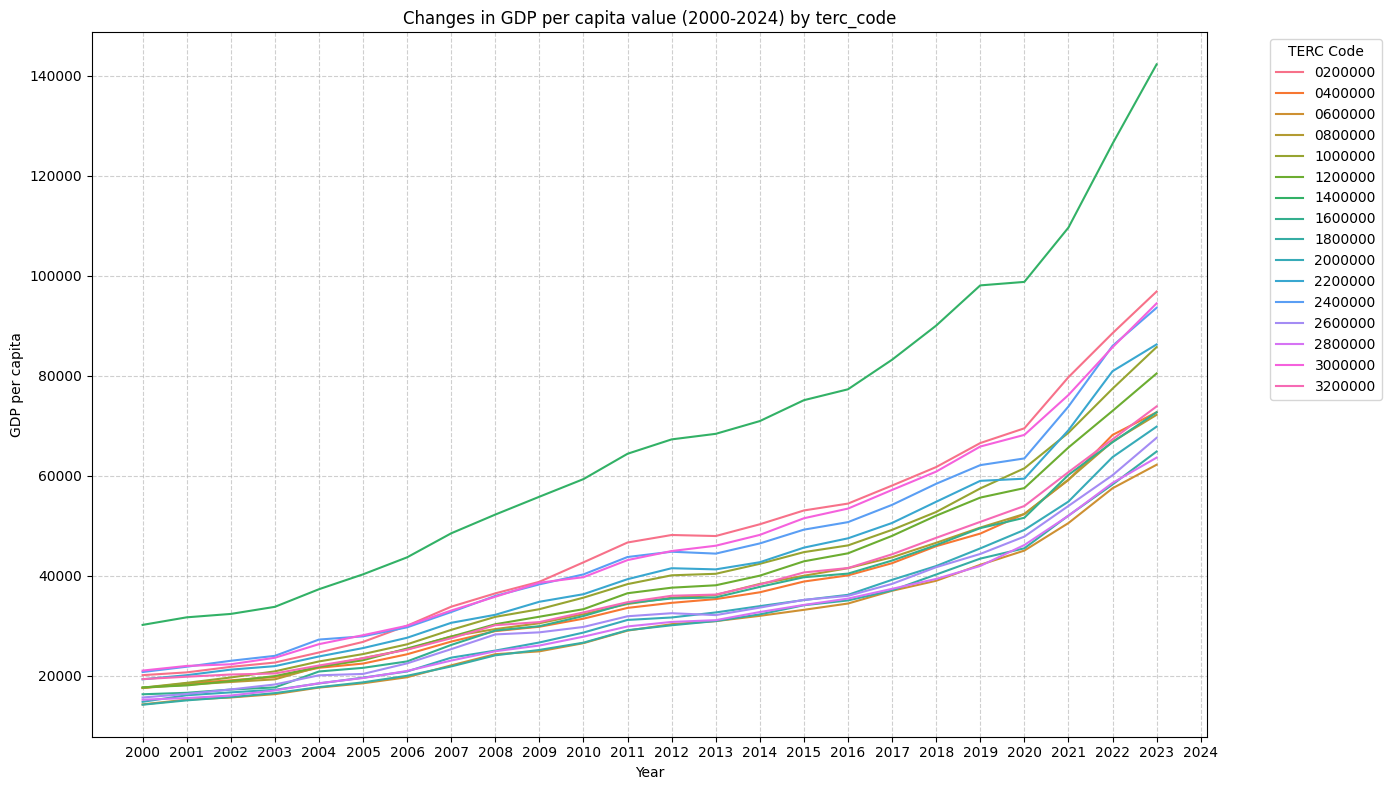

In [571]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data= gdp_per_capita_df, 
    x= "year", 
    y= "gdp_per_capita", 
    hue= "terc_code", 
    legend= "full"
)

plt.title("Changes in GDP per capita value (2000-2024) by terc_code")
plt.xlabel("Year")
plt.xticks(sorted(gdp_per_capita_df["year"].unique()))
plt.ylabel("GDP per capita")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title= "TERC Code", 
    bbox_to_anchor= (1.05, 1), 
    loc= "upper left"
    )
plt.tight_layout()
plt.show()

### Due to the lack of yet unpublished data for 2024, data for this year will be estimated using available data from previous years.

### Because the trend is non-linear (the lines clearly curve upwards and their slope increases over time, especially after 2015), an ARIMA model was used to predict the 2024 data rather than linear regression, which would result in an under-predicted 2024

In [572]:
predictions_2024_dict = {}

for terc_code in gdp_per_capita_df["terc_code"].unique():
    voivodeship_data = gdp_per_capita_df[gdp_per_capita_df["terc_code"] == terc_code].copy()
    voivodeship_data["year"] = pd.to_datetime(voivodeship_data["year"], format= '%Y')
    training_data = voivodeship_data.set_index("year")["gdp_per_capita"].dropna()
    
    model = pm.auto_arima(
        training_data, 
        start_p= 1, 
        start_q= 1, 
        max_p= 5, 
        max_q= 5, 
        m= 1, 
        d= None, 
        seasonal= False, 
        stepwise= True, 
        suppress_warnings= True, 
        error_action= "ignore"
    )
    prediction = model.predict(n_periods=1)
    predictions_2024_dict[terc_code] = prediction.iloc[0]

predictions_2024_series = pd.Series(predictions_2024_dict)
mask = (gdp_per_capita_df["year"] == 2024)
gdp_per_capita_df.loc[mask, "gdp_per_capita"] = gdp_per_capita_df.loc[mask, "terc_code"].map(predictions_2024_series)

del predictions_2024_series, predictions_2024_dict
del voivodeship_data
del training_data
del model

gdp_per_capita_df = gdp_per_capita_df.astype({"year": "int64"})
gdp_per_capita_df[gdp_per_capita_df["year"] == 2024]

terc_code  year  gdp_per_capita
24    0200000  2024        105172.0
49    0400000  2024         77214.0
74    0600000  2024         66883.0
99    0800000  2024         77521.0
124   1000000  2024         94033.0
149   1200000  2024         87922.0
174   1400000  2024        158147.0
199   1600000  2024         78664.0
224   1800000  2024         71417.0
249   2000000  2024         75895.0
274   2200000  2024         91605.0
299   2400000  2024        101190.0
324   2600000  2024         75041.0
349   2800000  2024         68654.0
374   3000000  2024        103245.0
399   3200000  2024         80427.0

----------------------------------------------
### Population density data (people per 1km^2)

In [573]:
population_density_df.head()

Kod                 Nazwa   Rok Wartosc
0  0201000  Powiat bolesławiecki  2000     NaN
1  0201000  Powiat bolesławiecki  2001     NaN
2  0201000  Powiat bolesławiecki  2002    67,6
3  0201000  Powiat bolesławiecki  2003    67,8
4  0201000  Powiat bolesławiecki  2004    67,8

In [574]:
population_density_df["Kod"] = population_density_df["Kod"].str[0:-2].str.zfill(4)
population_density_df = (
    population_density_df
    .set_axis([
        "terc_code", 
        "county", 
        "year", 
        "population_density"
    ], 
        axis= 1
    )
)

population_density_df["population_density"] = (
    population_density_df["population_density"]
    .str.replace(",",".")
    .astype("float64")
)

population_density_df["county"] = (
    population_density_df["county"]
    .str.replace("Powiat ", "")
    .str.replace("m. ", "")
    .str.replace("st. ", "")
)
population_density_df.head()

terc_code         county  year  population_density
0     02010  bolesławiecki  2000                 NaN
1     02010  bolesławiecki  2001                 NaN
2     02010  bolesławiecki  2002                67.6
3     02010  bolesławiecki  2003                67.8
4     02010  bolesławiecki  2004                67.8

In [575]:
population_density_df.describe()

year  population_density
count  9525.000000         8730.000000
mean   2012.000000          374.890241
std       7.211481          670.012921
min    2000.000000           17.900000
25%    2006.000000           60.500000
50%    2012.000000           89.800000
75%    2018.000000          185.650000
max    2024.000000         4255.500000

In [576]:
population_density_df[population_density_df.isna().any(axis= 1)]

terc_code          county  year  population_density
0        02010   bolesławiecki  2000                 NaN
1        02010   bolesławiecki  2001                 NaN
25       02020  dzierżoniowski  2000                 NaN
26       02020  dzierżoniowski  2001                 NaN
50       02030       głogowski  2000                 NaN
...        ...             ...   ...                 ...
9451     32610        Koszalin  2001                 NaN
9475     32620        Szczecin  2000                 NaN
9476     32620        Szczecin  2001                 NaN
9500     32630     Świnoujście  2000                 NaN
9501     32630     Świnoujście  2001                 NaN

[795 rows x 4 columns]

In [577]:
population_density_df[
    ~population_density_df["county"]
    .isin(county_names_ser)
]

terc_code             county  year  population_density
700     02630  Wałbrzych do 2002  2000                 NaN
701     02630  Wałbrzych do 2002  2001                 NaN
702     02630  Wałbrzych do 2002  2002              1529.9
703     02630  Wałbrzych do 2002  2003                 NaN
704     02630  Wałbrzych do 2002  2004                 NaN
705     02630  Wałbrzych do 2002  2005                 NaN
706     02630  Wałbrzych do 2002  2006                 NaN
707     02630  Wałbrzych do 2002  2007                 NaN
708     02630  Wałbrzych do 2002  2008                 NaN
709     02630  Wałbrzych do 2002  2009                 NaN
710     02630  Wałbrzych do 2002  2010                 NaN
711     02630  Wałbrzych do 2002  2011                 NaN
712     02630  Wałbrzych do 2002  2012                 NaN
713     02630  Wałbrzych do 2002  2013                 NaN
714     02630  Wałbrzych do 2002  2014                 NaN
715     02630  Wałbrzych do 2002  2015                 NaN
716     02630  Wałbrzych do 2002  2016                 NaN
717     02630  Wałbrzych do 2002  2017                 NaN
718     02630  Wałbrzych do 2002  2018                 NaN
719     02630  Wałbrzych do 2002  2019                 NaN
720     02630  Wałbrzych do 2002  2020                 NaN
721     02630  Wałbrzych do 2002  2021                 NaN
722     02630  Wałbrzych do 2002  2022                 NaN
723     02630  Wałbrzych do 2002  2023                 NaN
724     02630  Wałbrzych do 2002  2024                 NaN
750     02650  Wałbrzych od 2013  2000                 NaN
751     02650  Wałbrzych od 2013  2001                 NaN
752     02650  Wałbrzych od 2013  2002                 NaN
753     02650  Wałbrzych od 2013  2003                 NaN
754     02650  Wałbrzych od 2013  2004                 NaN
755     02650  Wałbrzych od 2013  2005                 NaN
756     02650  Wałbrzych od 2013  2006                 NaN
757     02650  Wałbrzych od 2013  2007                 NaN
758     02650  Wałbrzych od 2013  2008                 NaN
759     02650  Wałbrzych od 2013  2009                 NaN
760     02650  Wałbrzych od 2013  2010                 NaN
761     02650  Wałbrzych od 2013  2011                 NaN
762     02650  Wałbrzych od 2013  2012                 NaN
763     02650  Wałbrzych od 2013  2013              1392.3
764     02650  Wałbrzych od 2013  2014              1377.7
765     02650  Wałbrzych od 2013  2015              1363.1
766     02650  Wałbrzych od 2013  2016              1352.6
767     02650  Wałbrzych od 2013  2017              1341.5
768     02650  Wałbrzych od 2013  2018              1329.3
769     02650  Wałbrzych od 2013  2019              1314.7
770     02650  Wałbrzych od 2013  2020              1239.8
771     02650  Wałbrzych od 2013  2021              1219.2
772     02650  Wałbrzych od 2013  2022              1202.8
773     02650  Wałbrzych od 2013  2023              1184.4
774     02650  Wałbrzych od 2013  2024              1166.1

In [578]:
county_names_ser[
    ~county_names_ser
    .isin(population_density_df["county"])
]

3    Wałbrzych
Name: Powiat, dtype: string

In [579]:
mask =  (
    ((population_density_df["county"] == "Wałbrzych do 2002")
    & 
    (population_density_df["year"] > 2012)
    ) | (
    (population_density_df["county"] == "Wałbrzych od 2013")
    & 
    (population_density_df["year"] < 2013))
)
population_density_df = (
    population_density_df[~mask]
)
          

In [580]:
population_density_df[population_density_df["county"].str.startswith("Wałbrzych")]

terc_code             county  year  population_density
700     02630  Wałbrzych do 2002  2000                 NaN
701     02630  Wałbrzych do 2002  2001                 NaN
702     02630  Wałbrzych do 2002  2002              1529.9
703     02630  Wałbrzych do 2002  2003                 NaN
704     02630  Wałbrzych do 2002  2004                 NaN
705     02630  Wałbrzych do 2002  2005                 NaN
706     02630  Wałbrzych do 2002  2006                 NaN
707     02630  Wałbrzych do 2002  2007                 NaN
708     02630  Wałbrzych do 2002  2008                 NaN
709     02630  Wałbrzych do 2002  2009                 NaN
710     02630  Wałbrzych do 2002  2010                 NaN
711     02630  Wałbrzych do 2002  2011                 NaN
712     02630  Wałbrzych do 2002  2012                 NaN
763     02650  Wałbrzych od 2013  2013              1392.3
764     02650  Wałbrzych od 2013  2014              1377.7
765     02650  Wałbrzych od 2013  2015              1363.1
766     02650  Wałbrzych od 2013  2016              1352.6
767     02650  Wałbrzych od 2013  2017              1341.5
768     02650  Wałbrzych od 2013  2018              1329.3
769     02650  Wałbrzych od 2013  2019              1314.7
770     02650  Wałbrzych od 2013  2020              1239.8
771     02650  Wałbrzych od 2013  2021              1219.2
772     02650  Wałbrzych od 2013  2022              1202.8
773     02650  Wałbrzych od 2013  2023              1184.4
774     02650  Wałbrzych od 2013  2024              1166.1

In [581]:
population_density_df["county"] = (
    population_density_df["county"]
    .str.replace("Wałbrzych do 2002", "Wałbrzych")
    .str.replace("Wałbrzych od 2013", "Wałbrzych")
)
population_density_df[mask]

Empty DataFrame
Columns: [terc_code, county, year, population_density]
Index: []

### Due to the lack of data for the Wałbrzych county for the years 2003-2012 inclusive (no data in the statistical files of the Central Statistical Office), these data should be supplemented on the basis of data found in other sources.


In [582]:
missing_values = [
    1519, 1505, 1492, 1476, 1460, 
    1445, 1433, 1419, 1425, 1407
    ]
for i in range(10):
    mask = (
        (population_density_df["county"] == "Wałbrzych")
        &
        (population_density_df["year"] == 2003 + i)
    )
    population_density_df.loc[mask, "population_density"] = missing_values[i]

del missing_values
population_density_df[population_density_df["county"] == "Wałbrzych"]
         
         

terc_code     county  year  population_density
700     02630  Wałbrzych  2000                 NaN
701     02630  Wałbrzych  2001                 NaN
702     02630  Wałbrzych  2002              1529.9
703     02630  Wałbrzych  2003              1519.0
704     02630  Wałbrzych  2004              1505.0
705     02630  Wałbrzych  2005              1492.0
706     02630  Wałbrzych  2006              1476.0
707     02630  Wałbrzych  2007              1460.0
708     02630  Wałbrzych  2008              1445.0
709     02630  Wałbrzych  2009              1433.0
710     02630  Wałbrzych  2010              1419.0
711     02630  Wałbrzych  2011              1425.0
712     02630  Wałbrzych  2012              1407.0
763     02650  Wałbrzych  2013              1392.3
764     02650  Wałbrzych  2014              1377.7
765     02650  Wałbrzych  2015              1363.1
766     02650  Wałbrzych  2016              1352.6
767     02650  Wałbrzych  2017              1341.5
768     02650  Wałbrzych  2018              1329.3
769     02650  Wałbrzych  2019              1314.7
770     02650  Wałbrzych  2020              1239.8
771     02650  Wałbrzych  2021              1219.2
772     02650  Wałbrzych  2022              1202.8
773     02650  Wałbrzych  2023              1184.4
774     02650  Wałbrzych  2024              1166.1

In [583]:
population_density_df[population_density_df["county"] == "wałbrzyski"]

terc_code      county  year  population_density
500     02210  wałbrzyski  2000                 NaN
501     02210  wałbrzyski  2001                 NaN
502     02210  wałbrzyski  2002               139.1
503     02210  wałbrzyski  2003               366.1
504     02210  wałbrzyski  2004               363.1
505     02210  wałbrzyski  2005               360.6
506     02210  wałbrzyski  2006               356.8
507     02210  wałbrzyski  2007               353.7
508     02210  wałbrzyski  2008               351.1
509     02210  wałbrzyski  2009               348.6
510     02210  wałbrzyski  2010               350.0
511     02210  wałbrzyski  2011               347.2
512     02210  wałbrzyski  2012               344.9
513     02210  wałbrzyski  2013               134.4
514     02210  wałbrzyski  2014               133.6
515     02210  wałbrzyski  2015               132.5
516     02210  wałbrzyski  2016               132.0
517     02210  wałbrzyski  2017               131.2
518     02210  wałbrzyski  2018               130.2
519     02210  wałbrzyski  2019               129.3
520     02210  wałbrzyski  2020               125.7
521     02210  wałbrzyski  2021               124.4
522     02210  wałbrzyski  2022               123.5
523     02210  wałbrzyski  2023               122.4
524     02210  wałbrzyski  2024               121.5

### Due to the fact that in the years 2002-2012 the wałbrzyski county was connected with the Wałbrzych urban county, it is necessary to intervene in the data from this time period so that these data do not interfere with the training of the predictive model in the future. Extrapolation was used for this process based on data from the 2013-2024 time frame.

In [584]:
dcm.extrapolate_backwards_one_county(population_density_df, "population_density", "wałbrzyski", 2002, 2012)
population_density_df[population_density_df["county"] == "wałbrzyski"]



terc_code      county  year  population_density
500     02210  wałbrzyski  2000                 NaN
501     02210  wałbrzyski  2001                 NaN
502     02210  wałbrzyski  2002               149.2
503     02210  wałbrzyski  2003               148.0
504     02210  wałbrzyski  2004               146.7
505     02210  wałbrzyski  2005               145.4
506     02210  wałbrzyski  2006               144.2
507     02210  wałbrzyski  2007               142.9
508     02210  wałbrzyski  2008               141.6
509     02210  wałbrzyski  2009               140.4
510     02210  wałbrzyski  2010               139.1
511     02210  wałbrzyski  2011               137.9
512     02210  wałbrzyski  2012               136.6
513     02210  wałbrzyski  2013               134.4
514     02210  wałbrzyski  2014               133.6
515     02210  wałbrzyski  2015               132.5
516     02210  wałbrzyski  2016               132.0
517     02210  wałbrzyski  2017               131.2
518     02210  wałbrzyski  2018               130.2
519     02210  wałbrzyski  2019               129.3
520     02210  wałbrzyski  2020               125.7
521     02210  wałbrzyski  2021               124.4
522     02210  wałbrzyski  2022               123.5
523     02210  wałbrzyski  2023               122.4
524     02210  wałbrzyski  2024               121.5

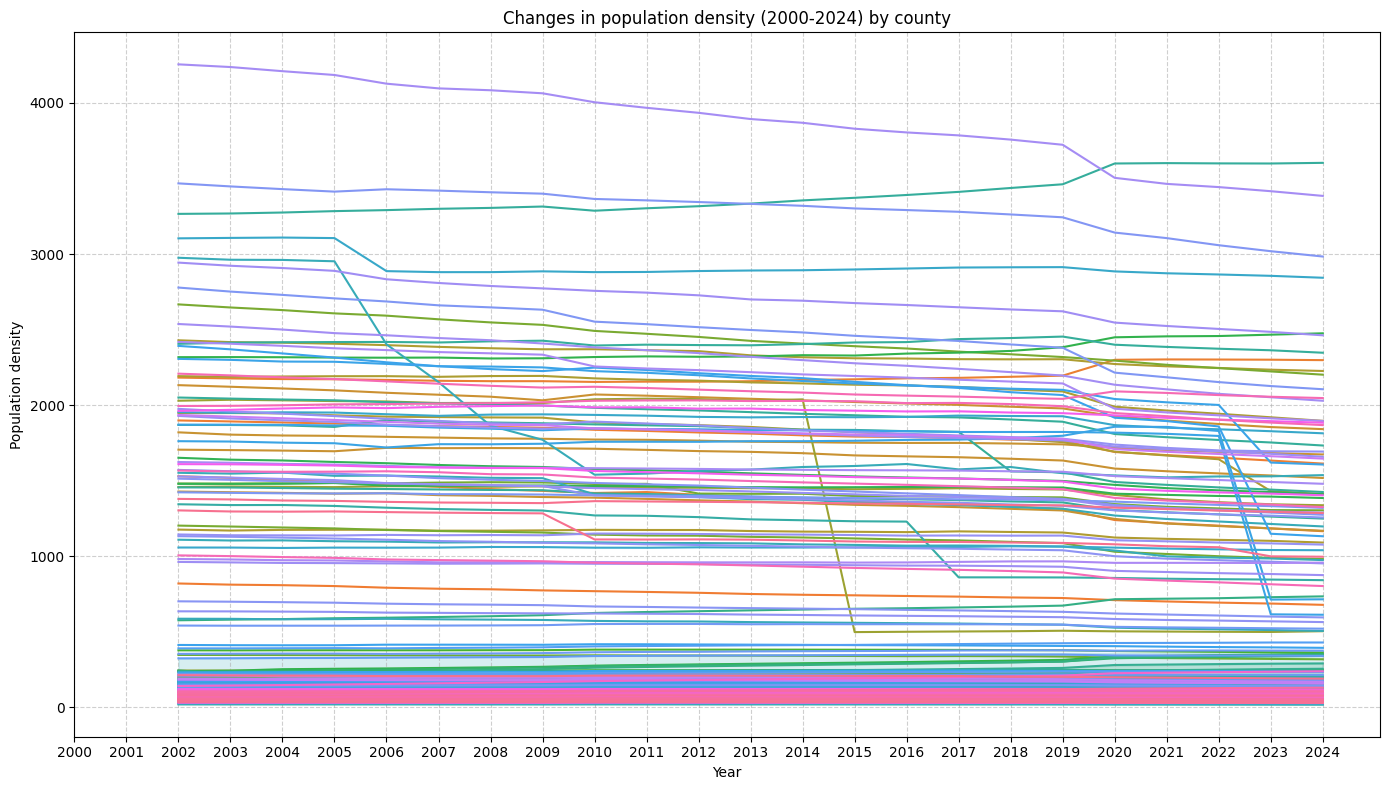

In [585]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data= population_density_df, 
    x= "year", 
    y= "population_density", 
    hue= "county", 
    legend= "full"
)

plt.title("Changes in population density (2000-2024) by county")
plt.xlabel("Year")
plt.xticks(sorted(population_density_df["year"].unique()))
plt.ylabel("Population density")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend().remove()
plt.tight_layout()
plt.show()

### Due to the lack of data for 2000 and 2001, data for that years will be estimated using available data from subsequent years.

### Due to outliers of data relating to population density in some years, to obtain data for 2000 and 2001, it was decided to use linear extrapolation, based on data from 2002 to 2004 inclusive, using data from the years closest to the searched period and at the same time years in which changes occurred linearly, which significantly reduces the possibility of incorrect prediction of these data by the selected method.

In [586]:
dcm.extrapolate_missing_2000_2001(population_density_df, "population_density")
population_density_df[population_density_df.isna().any(axis= 1)]

Empty DataFrame
Columns: [terc_code, county, year, population_density]
Index: []

In [587]:
population_density_df = dcm.update_terc_codes(population_density_df, territory_codes_df)
population_density_df.info()

<class 'pandas.DataFrame'>
Index: 9500 entries, 0 to 9524
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   terc_code           9500 non-null   str    
 1   county              9500 non-null   string 
 2   year                9500 non-null   int64  
 3   population_density  9500 non-null   float64
dtypes: float64(1), int64(1), str(1), string(1)
memory usage: 504.5 KB


------------------------------------------------------------------------------------
### Population 70 plus data


In [588]:
population_70_plus_df.head()

Kod   Nazwa   Rok    Wartosc
0  0000000  POLSKA  2000  3117609.0
1  0000000  POLSKA  2001  3216631.0
2  0000000  POLSKA  2002  3309427.0
3  0000000  POLSKA  2003  3380000.0
4  0000000  POLSKA  2004  3456569.0

In [589]:
population_70_plus_df["Kod"] = population_70_plus_df["Kod"].str[0:4]
population_70_plus_df = (
    population_70_plus_df[
        ~(population_70_plus_df["Nazwa"].str.isupper())
    ]
    .set_axis([
        "terc_code", 
        "county", 
        "year", 
        "population_70_plus"
    ], 
    axis= 1
    )
)

population_70_plus_df["county"] = (
    population_70_plus_df["county"]
    .str.replace("Powiat m. st. ", "")
    .str.replace("Powiat m. ", "")
    .str.replace("Powiat ", "")
)
population_70_plus_df.head()

terc_code         county  year  population_70_plus
50      0201  bolesławiecki  2000              5929.0
51      0201  bolesławiecki  2001              6223.0
52      0201  bolesławiecki  2002              6484.0
53      0201  bolesławiecki  2003              6771.0
54      0201  bolesławiecki  2004              7023.0

In [590]:
population_70_plus_df.describe()

year  population_70_plus
count  9550.00000         9476.000000
mean   2012.00000        10492.737653
std       7.21148        14994.692082
min    2000.00000         1512.000000
25%    2006.00000         5190.000000
50%    2012.00000         7403.000000
75%    2018.00000        11168.500000
max    2024.00000       269997.000000

In [591]:
population_70_plus_df[population_70_plus_df.isna().any(axis= 1)]

terc_code             county  year  population_70_plus
753       0263  Wałbrzych do 2002  2003                 NaN
754       0263  Wałbrzych do 2002  2004                 NaN
755       0263  Wałbrzych do 2002  2005                 NaN
756       0263  Wałbrzych do 2002  2006                 NaN
757       0263  Wałbrzych do 2002  2007                 NaN
...        ...                ...   ...                 ...
8426      2818          gołdapski  2001                 NaN
8450      2819        węgorzewski  2000                 NaN
8451      2819        węgorzewski  2001                 NaN
9875      3218            łobeski  2000                 NaN
9876      3218            łobeski  2001                 NaN

[74 rows x 4 columns]

In [592]:
population_70_plus_df[
    ~population_70_plus_df["county"]
    .isin(county_names_ser)
]

terc_code             county  year  population_70_plus
750       0263  Wałbrzych do 2002  2000             11559.0
751       0263  Wałbrzych do 2002  2001             12089.0
752       0263  Wałbrzych do 2002  2002             12604.0
753       0263  Wałbrzych do 2002  2003                 NaN
754       0263  Wałbrzych do 2002  2004                 NaN
...        ...                ...   ...                 ...
4420      1431         warszawski  2020                 NaN
4421      1431         warszawski  2021                 NaN
4422      1431         warszawski  2022                 NaN
4423      1431         warszawski  2023                 NaN
4424      1431         warszawski  2024                 NaN

[75 rows x 4 columns]

In [593]:
county_names_ser[
    ~county_names_ser
    .isin(population_70_plus_df["county"])
]

3    Wałbrzych
Name: Powiat, dtype: string

In [594]:
population_70_plus_df[population_70_plus_df["county"] == "Warszawa"]

terc_code    county  year  population_70_plus
4700      1465  Warszawa  2000                 NaN
4701      1465  Warszawa  2001                 NaN
4702      1465  Warszawa  2002            194074.0
4703      1465  Warszawa  2003            198885.0
4704      1465  Warszawa  2004            204164.0
4705      1465  Warszawa  2005            208988.0
4706      1465  Warszawa  2006            214170.0
4707      1465  Warszawa  2007            218116.0
4708      1465  Warszawa  2008            221778.0
4709      1465  Warszawa  2009            224392.0
4710      1465  Warszawa  2010            222680.0
4711      1465  Warszawa  2011            223712.0
4712      1465  Warszawa  2012            223497.0
4713      1465  Warszawa  2013            223867.0
4714      1465  Warszawa  2014            225314.0
4715      1465  Warszawa  2015            226367.0
4716      1465  Warszawa  2016            232100.0
4717      1465  Warszawa  2017            238324.0
4718      1465  Warszawa  2018            244150.0
4719      1465  Warszawa  2019            250366.0
4720      1465  Warszawa  2020            243757.0
4721      1465  Warszawa  2021            247786.0
4722      1465  Warszawa  2022            253979.0
4723      1465  Warszawa  2023            261363.0
4724      1465  Warszawa  2024            269997.0

In [595]:
for i in range(2):
    mask = (
        (population_70_plus_df["county"] == "Warszawa")
        &
        (population_70_plus_df["year"] == 2000 + i)
    )
    population_70_plus_df = (
        population_70_plus_df[~mask]
    )

for i in range(2):
    mask = (
        (population_70_plus_df["county"] == "warszawski")
        &
        (population_70_plus_df["year"] == 2000 + i)
    )
    population_70_plus_df.loc[mask, "county"] = "Warszawa"

mask = (population_70_plus_df["county"] == "warszawski")

population_70_plus_df = (
        population_70_plus_df[~mask]
)


In [596]:
population_70_plus_df[
    (
    (population_70_plus_df["county"].str.startswith("Wałbrzych"))
    &
    (population_70_plus_df["population_70_plus"].isna())
    )
]

terc_code             county  year  population_70_plus
753      0263  Wałbrzych do 2002  2003                 NaN
754      0263  Wałbrzych do 2002  2004                 NaN
755      0263  Wałbrzych do 2002  2005                 NaN
756      0263  Wałbrzych do 2002  2006                 NaN
757      0263  Wałbrzych do 2002  2007                 NaN
758      0263  Wałbrzych do 2002  2008                 NaN
759      0263  Wałbrzych do 2002  2009                 NaN
760      0263  Wałbrzych do 2002  2010                 NaN
761      0263  Wałbrzych do 2002  2011                 NaN
762      0263  Wałbrzych do 2002  2012                 NaN
763      0263  Wałbrzych do 2002  2013                 NaN
764      0263  Wałbrzych do 2002  2014                 NaN
765      0263  Wałbrzych do 2002  2015                 NaN
766      0263  Wałbrzych do 2002  2016                 NaN
767      0263  Wałbrzych do 2002  2017                 NaN
768      0263  Wałbrzych do 2002  2018                 NaN
769      0263  Wałbrzych do 2002  2019                 NaN
770      0263  Wałbrzych do 2002  2020                 NaN
771      0263  Wałbrzych do 2002  2021                 NaN
772      0263  Wałbrzych do 2002  2022                 NaN
773      0263  Wałbrzych do 2002  2023                 NaN
774      0263  Wałbrzych do 2002  2024                 NaN
800      0265  Wałbrzych od 2013  2000                 NaN
801      0265  Wałbrzych od 2013  2001                 NaN
802      0265  Wałbrzych od 2013  2002                 NaN
803      0265  Wałbrzych od 2013  2003                 NaN
804      0265  Wałbrzych od 2013  2004                 NaN
805      0265  Wałbrzych od 2013  2005                 NaN
806      0265  Wałbrzych od 2013  2006                 NaN
807      0265  Wałbrzych od 2013  2007                 NaN
808      0265  Wałbrzych od 2013  2008                 NaN
809      0265  Wałbrzych od 2013  2009                 NaN
810      0265  Wałbrzych od 2013  2010                 NaN
811      0265  Wałbrzych od 2013  2011                 NaN
812      0265  Wałbrzych od 2013  2012                 NaN

In [597]:
mask =  (
    ((population_70_plus_df["county"] == "Wałbrzych do 2002")
    & 
    (population_70_plus_df["year"] > 2012)
    ) | (
    (population_70_plus_df["county"] == "Wałbrzych od 2013")
    & 
    (population_70_plus_df["year"] < 2013))
)
population_70_plus_df = (
    population_70_plus_df[~mask]
)
          

In [598]:
population_70_plus_df[
    (
    (population_70_plus_df["county"].str.startswith("Wałbrzych"))
    &
    (population_70_plus_df["population_70_plus"].isna())
    )
]


terc_code             county  year  population_70_plus
753      0263  Wałbrzych do 2002  2003                 NaN
754      0263  Wałbrzych do 2002  2004                 NaN
755      0263  Wałbrzych do 2002  2005                 NaN
756      0263  Wałbrzych do 2002  2006                 NaN
757      0263  Wałbrzych do 2002  2007                 NaN
758      0263  Wałbrzych do 2002  2008                 NaN
759      0263  Wałbrzych do 2002  2009                 NaN
760      0263  Wałbrzych do 2002  2010                 NaN
761      0263  Wałbrzych do 2002  2011                 NaN
762      0263  Wałbrzych do 2002  2012                 NaN

In [599]:
population_70_plus_df["county"] = (
    population_70_plus_df["county"]
    .str.replace("Wałbrzych do 2002", "Wałbrzych")
    .str.replace("Wałbrzych od 2013", "Wałbrzych")
)
population_70_plus_df[population_70_plus_df["county"].str.startswith("Wałbrzych")]

terc_code     county  year  population_70_plus
750      0263  Wałbrzych  2000             11559.0
751      0263  Wałbrzych  2001             12089.0
752      0263  Wałbrzych  2002             12604.0
753      0263  Wałbrzych  2003                 NaN
754      0263  Wałbrzych  2004                 NaN
755      0263  Wałbrzych  2005                 NaN
756      0263  Wałbrzych  2006                 NaN
757      0263  Wałbrzych  2007                 NaN
758      0263  Wałbrzych  2008                 NaN
759      0263  Wałbrzych  2009                 NaN
760      0263  Wałbrzych  2010                 NaN
761      0263  Wałbrzych  2011                 NaN
762      0263  Wałbrzych  2012                 NaN
813      0265  Wałbrzych  2013             14339.0
814      0265  Wałbrzych  2014             14155.0
815      0265  Wałbrzych  2015             13994.0
816      0265  Wałbrzych  2016             14195.0
817      0265  Wałbrzych  2017             14515.0
818      0265  Wałbrzych  2018             15007.0
819      0265  Wałbrzych  2019             15565.0
820      0265  Wałbrzych  2020             15494.0
821      0265  Wałbrzych  2021             15869.0
822      0265  Wałbrzych  2022             16373.0
823      0265  Wałbrzych  2023             17034.0
824      0265  Wałbrzych  2024             17682.0

### Due to the lack of data for the Wałbrzych county for the years 2003-2012 inclusive (no data in the statistical files of the Central Statistical Office), these data should be supplemented on the basis of data found in other sources.


In [600]:
missing_values = [
    11_650, 12_010, 12_390, 12_750, 13_120, 
    13_490, 13_850, 14_230, 14_620, 14_910
    ]
for i in range(10):
    mask = (
        (population_70_plus_df["county"] == "Wałbrzych")
        &
        (population_70_plus_df["year"] == 2003 + i)
    )
    population_70_plus_df.loc[mask, "population_70_plus"] = missing_values[i]
del missing_values
population_70_plus_df[population_70_plus_df["county"] == "Wałbrzych"] 


terc_code     county  year  population_70_plus
750      0263  Wałbrzych  2000             11559.0
751      0263  Wałbrzych  2001             12089.0
752      0263  Wałbrzych  2002             12604.0
753      0263  Wałbrzych  2003             11650.0
754      0263  Wałbrzych  2004             12010.0
755      0263  Wałbrzych  2005             12390.0
756      0263  Wałbrzych  2006             12750.0
757      0263  Wałbrzych  2007             13120.0
758      0263  Wałbrzych  2008             13490.0
759      0263  Wałbrzych  2009             13850.0
760      0263  Wałbrzych  2010             14230.0
761      0263  Wałbrzych  2011             14620.0
762      0263  Wałbrzych  2012             14910.0
813      0265  Wałbrzych  2013             14339.0
814      0265  Wałbrzych  2014             14155.0
815      0265  Wałbrzych  2015             13994.0
816      0265  Wałbrzych  2016             14195.0
817      0265  Wałbrzych  2017             14515.0
818      0265  Wałbrzych  2018             15007.0
819      0265  Wałbrzych  2019             15565.0
820      0265  Wałbrzych  2020             15494.0
821      0265  Wałbrzych  2021             15869.0
822      0265  Wałbrzych  2022             16373.0
823      0265  Wałbrzych  2023             17034.0
824      0265  Wałbrzych  2024             17682.0

In [601]:
population_70_plus_df[population_70_plus_df["county"] == "wałbrzyski"]

terc_code      county  year  population_70_plus
550      0221  wałbrzyski  2000              5495.0
551      0221  wałbrzyski  2001              5655.0
552      0221  wałbrzyski  2002              5919.0
553      0221  wałbrzyski  2003             19138.0
554      0221  wałbrzyski  2004             19583.0
555      0221  wałbrzyski  2005             20159.0
556      0221  wałbrzyski  2006             20653.0
557      0221  wałbrzyski  2007             20948.0
558      0221  wałbrzyski  2008             21250.0
559      0221  wałbrzyski  2009             21435.0
560      0221  wałbrzyski  2010             21463.0
561      0221  wałbrzyski  2011             21438.0
562      0221  wałbrzyski  2012             21120.0
563      0221  wałbrzyski  2013              6582.0
564      0221  wałbrzyski  2014              6488.0
565      0221  wałbrzyski  2015              6330.0
566      0221  wałbrzyski  2016              6356.0
567      0221  wałbrzyski  2017              6465.0
568      0221  wałbrzyski  2018              6611.0
569      0221  wałbrzyski  2019              6731.0
570      0221  wałbrzyski  2020              6817.0
571      0221  wałbrzyski  2021              7014.0
572      0221  wałbrzyski  2022              7229.0
573      0221  wałbrzyski  2023              7472.0
574      0221  wałbrzyski  2024              7749.0

In [602]:
population_70_plus_df = dcm.update_terc_codes(population_70_plus_df, territory_codes_df)

### Due to the fact that in the years 2002-2013 the wałbrzyski county was connected with the Wałbrzych urban county, it is necessary to intervene in the data from this time period so that these data do not interfere with the training of the predictive model in the future. The data for the Wałbrzych county from these years were removed from the data for the wałbrzyski county.

In [603]:
for i in range(10):
    mask = (
        (population_70_plus_df["county"] == "wałbrzyski")
        &
        (population_70_plus_df["year"] == 2003 + i)
    )
    mask_2 = (
        (population_70_plus_df["county"] == "Wałbrzych")
        &
        (population_70_plus_df["year"] == 2003 + i)
    )
    population_70_plus_df.loc[mask, "population_70_plus"] -= (
        population_70_plus_df.loc[mask_2, "population_70_plus"].values
    )
del mask_2
population_70_plus_df[population_70_plus_df["county"] == "wałbrzyski"]

terc_code      county  year  population_70_plus
550      0221  wałbrzyski  2000              5495.0
551      0221  wałbrzyski  2001              5655.0
552      0221  wałbrzyski  2002              5919.0
553      0221  wałbrzyski  2003              7488.0
554      0221  wałbrzyski  2004              7573.0
555      0221  wałbrzyski  2005              7769.0
556      0221  wałbrzyski  2006              7903.0
557      0221  wałbrzyski  2007              7828.0
558      0221  wałbrzyski  2008              7760.0
559      0221  wałbrzyski  2009              7585.0
560      0221  wałbrzyski  2010              7233.0
561      0221  wałbrzyski  2011              6818.0
562      0221  wałbrzyski  2012              6210.0
563      0221  wałbrzyski  2013              6582.0
564      0221  wałbrzyski  2014              6488.0
565      0221  wałbrzyski  2015              6330.0
566      0221  wałbrzyski  2016              6356.0
567      0221  wałbrzyski  2017              6465.0
568      0221  wałbrzyski  2018              6611.0
569      0221  wałbrzyski  2019              6731.0
570      0221  wałbrzyski  2020              6817.0
571      0221  wałbrzyski  2021              7014.0
572      0221  wałbrzyski  2022              7229.0
573      0221  wałbrzyski  2023              7472.0
574      0221  wałbrzyski  2024              7749.0

In [604]:
population_70_plus_df[population_70_plus_df.isna().any(axis= 1)]

terc_code       county  year  population_70_plus
2350      0812    wschowski  2000                 NaN
2351      0812    wschowski  2001                 NaN
2950      1021   brzeziński  2000                 NaN
2951      1021   brzeziński  2001                 NaN
5575      1821        leski  2000                 NaN
5576      1821        leski  2001                 NaN
6550      2216     sztumski  2000                 NaN
6551      2216     sztumski  2001                 NaN
8425      2818    gołdapski  2000                 NaN
8426      2818    gołdapski  2001                 NaN
8450      2819  węgorzewski  2000                 NaN
8451      2819  węgorzewski  2001                 NaN
9875      3218      łobeski  2000                 NaN
9876      3218      łobeski  2001                 NaN

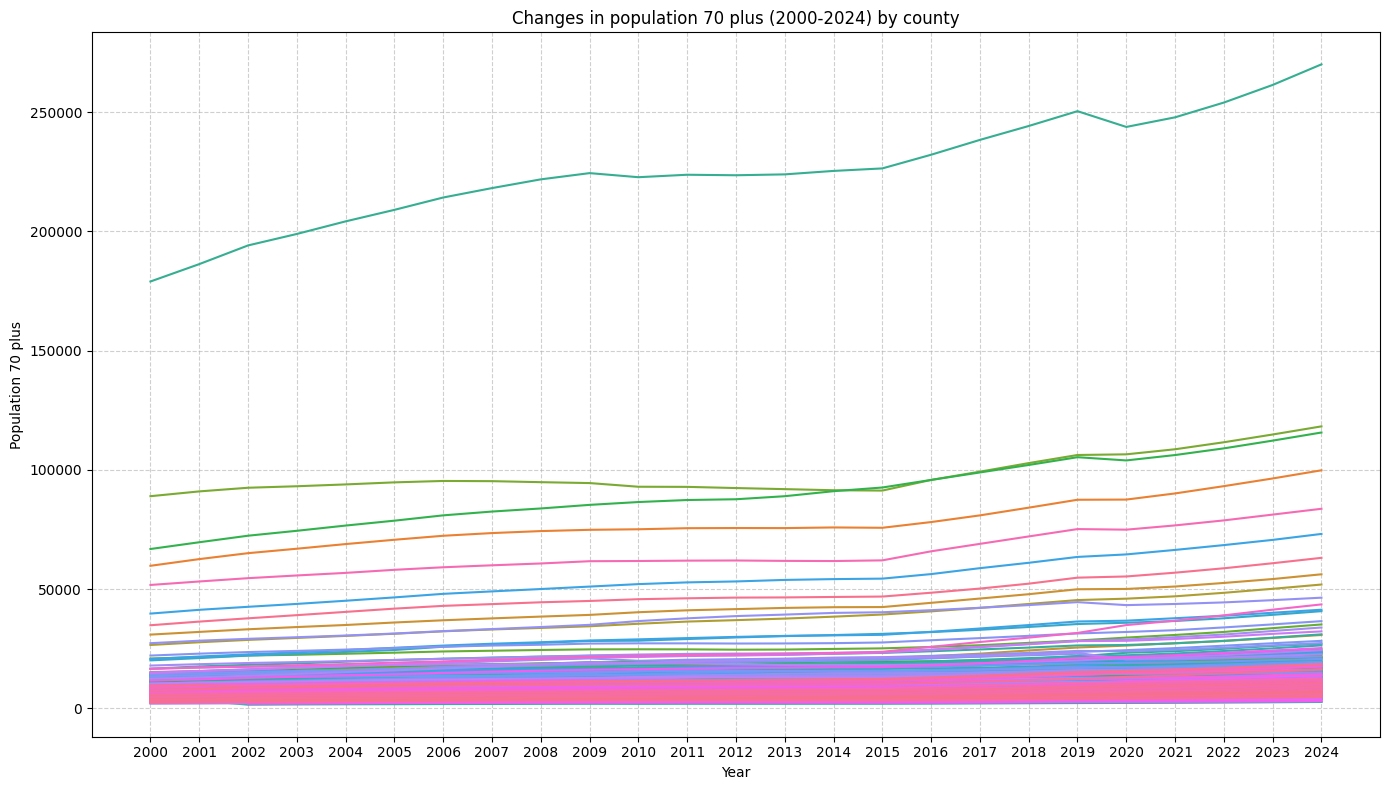

In [605]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data= population_70_plus_df, 
    x= "year", 
    y= "population_70_plus", 
    hue= "county", 
    legend= "full"
)

plt.title("Changes in population 70 plus (2000-2024) by county")
plt.xlabel("Year")
plt.xticks(sorted(population_70_plus_df["year"].unique()))
plt.ylabel("Population 70 plus")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend().remove()
plt.tight_layout()
plt.show()

### Due to the lack of data for 2000 and 2001 for some counties, data for this year will be estimated using available data from subsequent years.

### Because the trend is non-linear (the lines clearly curve upwards and their slope increases over time), an ARIMA model was used to predict the 2000 and 2001 data rather than linear regression.

### Due to the extensiveness of the operation and the lack of appropriate optimizations of the ARIMA module, the joblib module was used, which enables parallel processing that also involves other processor cores in parallel calculations. In this way, the speed of code processing was improved five times.

In [606]:
population_70_plus_df[population_70_plus_df.duplicated(subset=["county", "year", "terc_code"], keep=False)]

Empty DataFrame
Columns: [terc_code, county, year, population_70_plus]
Index: []

In [607]:
population_70_plus_df["year"] = population_70_plus_df["year"].astype(int)
population_70_plus_df["terc_code"] = population_70_plus_df["terc_code"].astype(str)
population_70_plus_df["county"] = population_70_plus_df["county"].astype(str)

population_70_plus_df = population_70_plus_df.drop_duplicates(subset=["county", "year", "terc_code"])

current_years = population_70_plus_df["year"].unique()
target_years = [2000, 2001]
all_years = np.unique(np.concatenate((current_years, target_years))).astype(int)

unique_entities = population_70_plus_df[["county", "terc_code"]].drop_duplicates().values

index_tuples = [
    (str(county), int(year), str(terc)) 
    for county, terc in unique_entities 
    for year in all_years
]

full_index = pd.MultiIndex.from_tuples(
    index_tuples, 
    names=["county", "year", "terc_code"]
)

population_70_plus_df = (
    population_70_plus_df
    .set_index(["county", "year", "terc_code"])
    .reindex(full_index)
    .reset_index()
)
population_70_plus_df.head()

county  year terc_code  population_70_plus
0  bolesławiecki  2000      0201              5929.0
1  bolesławiecki  2001      0201              6223.0
2  bolesławiecki  2002      0201              6484.0
3  bolesławiecki  2003      0201              6771.0
4  bolesławiecki  2004      0201              7023.0

In [608]:
column_name = "population_70_plus"
population_70_plus_df["year"] = population_70_plus_df["year"].astype(int)
population_70_plus_df = population_70_plus_df.sort_values(["county", "year"], ascending=[True, True])
grouped_df = population_70_plus_df.dropna(subset=[column_name])

groups_data = [
    (county, df[column_name].to_numpy()) 
    for county, df in grouped_df.groupby("county")
]


results = Parallel(n_jobs=-1, verbose=5)(delayed(dcm.backcasting_arima)(county_id, vals, 2) for county_id, vals in groups_data)
valid_results = [res for res in results if res is not None]

population_70_plus_df = dcm.update_df_after_arima_backcasting(population_70_plus_df, valid_results, column_name, 2001)

del column_name
del grouped_df, groups_data
del results, valid_results 

print(population_70_plus_df[population_70_plus_df.isna().any(axis=1)])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   57.2s


Empty DataFrame
Columns: [county, year, terc_code, population_70_plus]
Index: []


[Parallel(n_jobs=-1)]: Done 370 out of 370 | elapsed:  1.2min finished


In [609]:
population_70_plus_df.head()

county  year terc_code  population_70_plus
0  Biała Podlaska  2000      0661              2786.0
1  Biała Podlaska  2001      0661              2957.0
2  Biała Podlaska  2002      0661              3399.0
3  Biała Podlaska  2003      0661              3437.0
4  Biała Podlaska  2004      0661              3567.0

-----------------------------------------
### Total population data

In [610]:
total_population_df.head()

Kod   Nazwa   Rok     Wartosc
0  0000000  POLSKA  2000  38253955.0
1  0000000  POLSKA  2001  38242197.0
2  0000000  POLSKA  2002  38218531.0
3  0000000  POLSKA  2003  38190608.0
4  0000000  POLSKA  2004  38173835.0

In [611]:
total_population_df["Kod"] = total_population_df["Kod"].str[0:4]
total_population_df = (
    total_population_df[
        ~(total_population_df["Nazwa"].str.isupper())
    ]
    .set_axis([
        "terc_code", 
        "county", 
        "year", 
        "total_population"
    ], 
    axis= 1
    )
)

total_population_df["county"] = (
    total_population_df["county"]
    .str.replace("Powiat m. st. ", "")
    .str.replace("Powiat m. ", "")
    .str.replace("Powiat ", "")
)


In [612]:
total_population_df.describe()

year  total_population
count  9550.00000      9.476000e+03
mean   2012.00000      1.008170e+05
std       7.21148      1.185579e+05
min    2000.00000      1.843400e+04
25%    2006.00000      5.445200e+04
50%    2012.00000      7.557750e+04
75%    2018.00000      1.110540e+05
max    2024.00000      1.863845e+06

In [613]:
total_population_df[total_population_df["total_population"].isna()]
    

terc_code             county  year  total_population
753       0263  Wałbrzych do 2002  2003               NaN
754       0263  Wałbrzych do 2002  2004               NaN
755       0263  Wałbrzych do 2002  2005               NaN
756       0263  Wałbrzych do 2002  2006               NaN
757       0263  Wałbrzych do 2002  2007               NaN
...        ...                ...   ...               ...
8426      2818          gołdapski  2001               NaN
8450      2819        węgorzewski  2000               NaN
8451      2819        węgorzewski  2001               NaN
9875      3218            łobeski  2000               NaN
9876      3218            łobeski  2001               NaN

[74 rows x 4 columns]

In [614]:
total_population_df[
    ~total_population_df["county"]
    .isin(county_names_ser)
]

terc_code             county  year  total_population
750       0263  Wałbrzych do 2002  2000          131675.0
751       0263  Wałbrzych do 2002  2001          130668.0
752       0263  Wałbrzych do 2002  2002          129724.0
753       0263  Wałbrzych do 2002  2003               NaN
754       0263  Wałbrzych do 2002  2004               NaN
...        ...                ...   ...               ...
4420      1431         warszawski  2020               NaN
4421      1431         warszawski  2021               NaN
4422      1431         warszawski  2022               NaN
4423      1431         warszawski  2023               NaN
4424      1431         warszawski  2024               NaN

[75 rows x 4 columns]

In [615]:
county_names_ser[
    ~county_names_ser
    .isin(total_population_df["county"])
]

3    Wałbrzych
Name: Powiat, dtype: string

In [616]:
for i in range(2):
    mask = (
        (total_population_df["county"] == "Warszawa")
        &
        (total_population_df["year"] == 2000 + i)
    )
    total_population_df = (
        total_population_df[~mask]
    )

for i in range(2):
    mask = (
        (total_population_df["county"] == "warszawski")
        &
        (total_population_df["year"] == 2000 + i)
    )
    total_population_df.loc[mask, "county"] = "Warszawa"

mask = (total_population_df["county"] == "warszawski")

total_population_df = (
        total_population_df[~mask]
)


In [617]:
total_population_df[
    (
    (total_population_df["county"].str.startswith("Wałbrzych"))
    &
    (total_population_df["total_population"].isna())
    )
]


terc_code             county  year  total_population
753      0263  Wałbrzych do 2002  2003               NaN
754      0263  Wałbrzych do 2002  2004               NaN
755      0263  Wałbrzych do 2002  2005               NaN
756      0263  Wałbrzych do 2002  2006               NaN
757      0263  Wałbrzych do 2002  2007               NaN
758      0263  Wałbrzych do 2002  2008               NaN
759      0263  Wałbrzych do 2002  2009               NaN
760      0263  Wałbrzych do 2002  2010               NaN
761      0263  Wałbrzych do 2002  2011               NaN
762      0263  Wałbrzych do 2002  2012               NaN
763      0263  Wałbrzych do 2002  2013               NaN
764      0263  Wałbrzych do 2002  2014               NaN
765      0263  Wałbrzych do 2002  2015               NaN
766      0263  Wałbrzych do 2002  2016               NaN
767      0263  Wałbrzych do 2002  2017               NaN
768      0263  Wałbrzych do 2002  2018               NaN
769      0263  Wałbrzych do 2002  2019               NaN
770      0263  Wałbrzych do 2002  2020               NaN
771      0263  Wałbrzych do 2002  2021               NaN
772      0263  Wałbrzych do 2002  2022               NaN
773      0263  Wałbrzych do 2002  2023               NaN
774      0263  Wałbrzych do 2002  2024               NaN
800      0265  Wałbrzych od 2013  2000               NaN
801      0265  Wałbrzych od 2013  2001               NaN
802      0265  Wałbrzych od 2013  2002               NaN
803      0265  Wałbrzych od 2013  2003               NaN
804      0265  Wałbrzych od 2013  2004               NaN
805      0265  Wałbrzych od 2013  2005               NaN
806      0265  Wałbrzych od 2013  2006               NaN
807      0265  Wałbrzych od 2013  2007               NaN
808      0265  Wałbrzych od 2013  2008               NaN
809      0265  Wałbrzych od 2013  2009               NaN
810      0265  Wałbrzych od 2013  2010               NaN
811      0265  Wałbrzych od 2013  2011               NaN
812      0265  Wałbrzych od 2013  2012               NaN

In [618]:
mask =  (
    ((total_population_df["county"] == "Wałbrzych do 2002")
    & 
    (total_population_df["year"] > 2012)
    ) | (
    (total_population_df["county"] == "Wałbrzych od 2013")
    & 
    (total_population_df["year"] < 2013))
)
total_population_df = (
    total_population_df[~mask]
)
          

In [619]:
total_population_df[
    (
    (total_population_df["county"].str.startswith("Wałbrzych"))
    &
    (total_population_df["total_population"].isna())
    )
]


terc_code             county  year  total_population
753      0263  Wałbrzych do 2002  2003               NaN
754      0263  Wałbrzych do 2002  2004               NaN
755      0263  Wałbrzych do 2002  2005               NaN
756      0263  Wałbrzych do 2002  2006               NaN
757      0263  Wałbrzych do 2002  2007               NaN
758      0263  Wałbrzych do 2002  2008               NaN
759      0263  Wałbrzych do 2002  2009               NaN
760      0263  Wałbrzych do 2002  2010               NaN
761      0263  Wałbrzych do 2002  2011               NaN
762      0263  Wałbrzych do 2002  2012               NaN

In [620]:
total_population_df["county"] = (
    total_population_df["county"]
    .str.replace("Wałbrzych do 2002", "Wałbrzych")
    .str.replace("Wałbrzych od 2013", "Wałbrzych")
)
total_population_df[total_population_df["county"].str.startswith("Wałbrzych")]

terc_code     county  year  total_population
750      0263  Wałbrzych  2000          131675.0
751      0263  Wałbrzych  2001          130668.0
752      0263  Wałbrzych  2002          129724.0
753      0263  Wałbrzych  2003               NaN
754      0263  Wałbrzych  2004               NaN
755      0263  Wałbrzych  2005               NaN
756      0263  Wałbrzych  2006               NaN
757      0263  Wałbrzych  2007               NaN
758      0263  Wałbrzych  2008               NaN
759      0263  Wałbrzych  2009               NaN
760      0263  Wałbrzych  2010               NaN
761      0263  Wałbrzych  2011               NaN
762      0263  Wałbrzych  2012               NaN
813      0265  Wałbrzych  2013          117926.0
814      0265  Wałbrzych  2014          116691.0
815      0265  Wałbrzych  2015          115453.0
816      0265  Wałbrzych  2016          114568.0
817      0265  Wałbrzych  2017          113621.0
818      0265  Wałbrzych  2018          112594.0
819      0265  Wałbrzych  2019          111356.0
820      0265  Wałbrzych  2020          105007.0
821      0265  Wałbrzych  2021          103263.0
822      0265  Wałbrzych  2022          101857.0
823      0265  Wałbrzych  2023          100294.0
824      0265  Wałbrzych  2024           98748.0

### Due to the lack of data for the Wałbrzych county for the years 2003-2012 inclusive (no data in the statistical files of the Central Statistical Office), these data should be supplemented on the basis of data found in other sources.

In [621]:
missing_values = [
    128_809, 127_566, 126_465, 124_988, 123_635, 
    122_411, 121_363, 120_197, 118_556, 116_691
    ]
for i in range(10):
    mask = (
        (total_population_df["county"] == "Wałbrzych")
        &
        (total_population_df["year"] == 2003 + i)
    )
    total_population_df.loc[mask, "total_population"] = missing_values[i]
del missing_values
total_population_df[total_population_df["county"] == "Wałbrzych"] 

terc_code     county  year  total_population
750      0263  Wałbrzych  2000          131675.0
751      0263  Wałbrzych  2001          130668.0
752      0263  Wałbrzych  2002          129724.0
753      0263  Wałbrzych  2003          128809.0
754      0263  Wałbrzych  2004          127566.0
755      0263  Wałbrzych  2005          126465.0
756      0263  Wałbrzych  2006          124988.0
757      0263  Wałbrzych  2007          123635.0
758      0263  Wałbrzych  2008          122411.0
759      0263  Wałbrzych  2009          121363.0
760      0263  Wałbrzych  2010          120197.0
761      0263  Wałbrzych  2011          118556.0
762      0263  Wałbrzych  2012          116691.0
813      0265  Wałbrzych  2013          117926.0
814      0265  Wałbrzych  2014          116691.0
815      0265  Wałbrzych  2015          115453.0
816      0265  Wałbrzych  2016          114568.0
817      0265  Wałbrzych  2017          113621.0
818      0265  Wałbrzych  2018          112594.0
819      0265  Wałbrzych  2019          111356.0
820      0265  Wałbrzych  2020          105007.0
821      0265  Wałbrzych  2021          103263.0
822      0265  Wałbrzych  2022          101857.0
823      0265  Wałbrzych  2023          100294.0
824      0265  Wałbrzych  2024           98748.0

In [622]:
total_population_df[total_population_df["county"] == "wałbrzyski"]

terc_code      county  year  total_population
550      0221  wałbrzyski  2000           60084.0
551      0221  wałbrzyski  2001           59947.0
552      0221  wałbrzyski  2002           59739.0
553      0221  wałbrzyski  2003          188229.0
554      0221  wałbrzyski  2004          186708.0
555      0221  wałbrzyski  2005          185399.0
556      0221  wałbrzyski  2006          183689.0
557      0221  wałbrzyski  2007          182104.0
558      0221  wałbrzyski  2008          180776.0
559      0221  wałbrzyski  2009          179526.0
560      0221  wałbrzyski  2010          180209.0
561      0221  wałbrzyski  2011          178776.0
562      0221  wałbrzyski  2012          177604.0
563      0221  wałbrzyski  2013           57834.0
564      0221  wałbrzyski  2014           57492.0
565      0221  wałbrzyski  2015           57023.0
566      0221  wałbrzyski  2016           56788.0
567      0221  wałbrzyski  2017           56446.0
568      0221  wałbrzyski  2018           56004.0
569      0221  wałbrzyski  2019           55611.0
570      0221  wałbrzyski  2020           54085.0
571      0221  wałbrzyski  2021           53534.0
572      0221  wałbrzyski  2022           53115.0
573      0221  wałbrzyski  2023           52656.0
574      0221  wałbrzyski  2024           52275.0

### Due to the fact that in the years 2002-2013 the wałbrzyski county was connected with the Wałbrzych urban county, it is necessary to intervene in the data from this time period so that these data do not interfere with the training of the predictive model in the future. The data for the Wałbrzych county from these years were removed from the data for the wałbrzyski county.

In [623]:
for i in range(10):
    mask = (
        (total_population_df["county"] == "wałbrzyski")
        &
        (total_population_df["year"] == 2003 + i)
    )
    mask_2 = (
        (total_population_df["county"] == "Wałbrzych")
        &
        (total_population_df["year"] == 2003 + i)
    )
    total_population_df.loc[mask, "total_population"] -= (
        total_population_df.loc[mask_2, "total_population"].values
    )
del mask_2
total_population_df[total_population_df["county"] == "wałbrzyski"]

terc_code      county  year  total_population
550      0221  wałbrzyski  2000           60084.0
551      0221  wałbrzyski  2001           59947.0
552      0221  wałbrzyski  2002           59739.0
553      0221  wałbrzyski  2003           59420.0
554      0221  wałbrzyski  2004           59142.0
555      0221  wałbrzyski  2005           58934.0
556      0221  wałbrzyski  2006           58701.0
557      0221  wałbrzyski  2007           58469.0
558      0221  wałbrzyski  2008           58365.0
559      0221  wałbrzyski  2009           58163.0
560      0221  wałbrzyski  2010           60012.0
561      0221  wałbrzyski  2011           60220.0
562      0221  wałbrzyski  2012           60913.0
563      0221  wałbrzyski  2013           57834.0
564      0221  wałbrzyski  2014           57492.0
565      0221  wałbrzyski  2015           57023.0
566      0221  wałbrzyski  2016           56788.0
567      0221  wałbrzyski  2017           56446.0
568      0221  wałbrzyski  2018           56004.0
569      0221  wałbrzyski  2019           55611.0
570      0221  wałbrzyski  2020           54085.0
571      0221  wałbrzyski  2021           53534.0
572      0221  wałbrzyski  2022           53115.0
573      0221  wałbrzyski  2023           52656.0
574      0221  wałbrzyski  2024           52275.0

In [624]:
total_population_df = dcm.update_terc_codes(total_population_df, territory_codes_df)

In [625]:
total_population_df[total_population_df.isna().any(axis= 1)]

terc_code       county  year  total_population
2350      0812    wschowski  2000               NaN
2351      0812    wschowski  2001               NaN
2950      1021   brzeziński  2000               NaN
2951      1021   brzeziński  2001               NaN
5575      1821        leski  2000               NaN
5576      1821        leski  2001               NaN
6550      2216     sztumski  2000               NaN
6551      2216     sztumski  2001               NaN
8425      2818    gołdapski  2000               NaN
8426      2818    gołdapski  2001               NaN
8450      2819  węgorzewski  2000               NaN
8451      2819  węgorzewski  2001               NaN
9875      3218      łobeski  2000               NaN
9876      3218      łobeski  2001               NaN

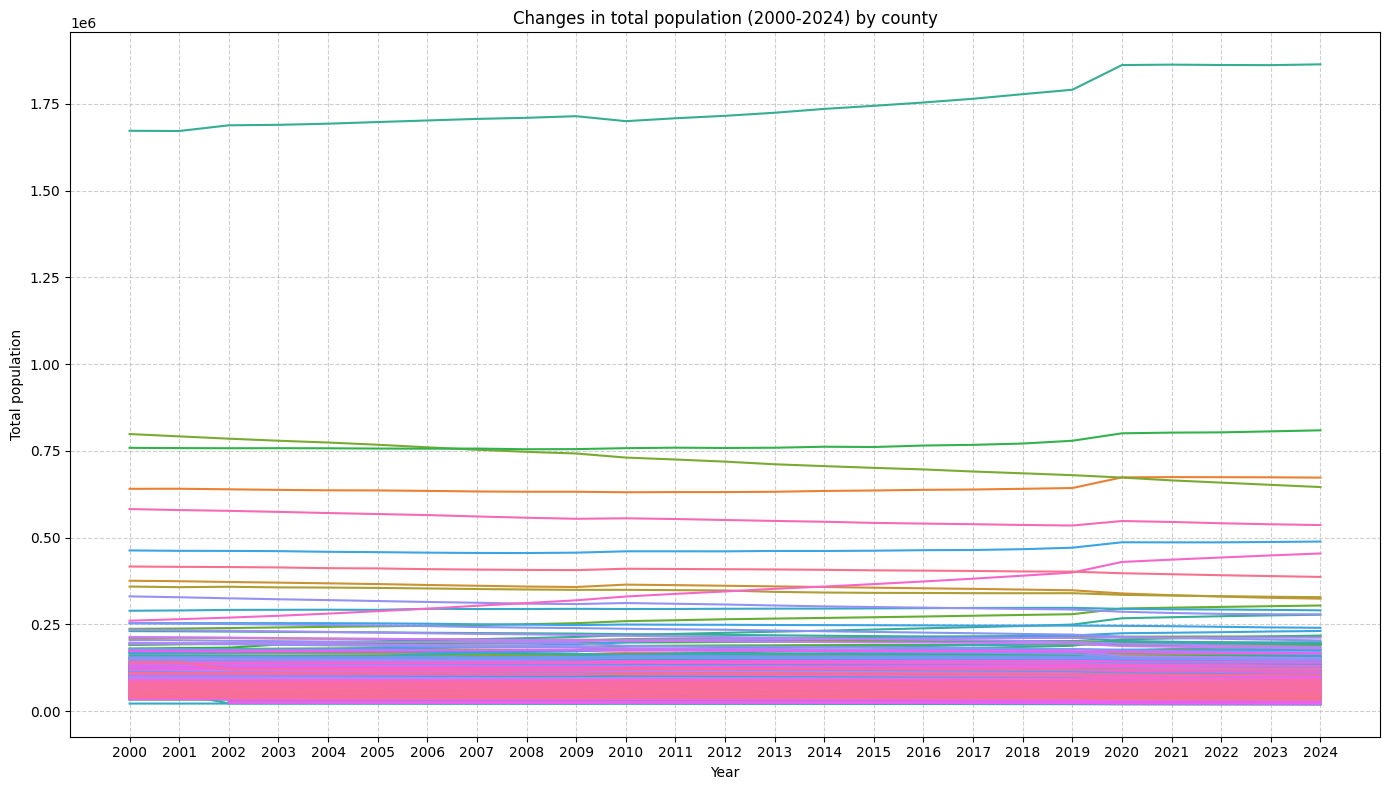

In [626]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data= total_population_df, 
    x= "year", 
    y= "total_population", 
    hue= "county", 
    legend= "full"
)

plt.title("Changes in total population (2000-2024) by county")
plt.xlabel("Year")
plt.xticks(sorted(total_population_df["year"].unique()))
plt.ylabel("Total population")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend().remove()
plt.tight_layout()
plt.show()

### Due to the lack of data for 2000 and 2001 for some counties, data for this year will be estimated using available data from subsequent years.

### Because the trend is non-linear (the lines clearly curve upwards and their slope increases over time), an ARIMA model was used to predict the 2000 and 2001 data rather than linear regression.

### Due to the extensiveness of the operation and the lack of appropriate optimizations of the ARIMA module, the joblib module was used, which enables parallel processing that also involves other processor cores in parallel calculations. In this way, the speed of code processing was improved five times.(A previously defined function was used)

In [627]:
total_population_df["year"] = total_population_df["year"].astype(int)
total_population_df["terc_code"] = total_population_df["terc_code"].astype(str)
total_population_df["county"] = total_population_df["county"].astype(str)

total_population_df = total_population_df.drop_duplicates(subset=["county", "year", "terc_code"])

current_years = total_population_df["year"].unique()
target_years = [2000, 2001]
all_years = np.unique(np.concatenate((current_years, target_years))).astype(int)

unique_entities = total_population_df[["county", "terc_code"]].drop_duplicates().values

index_tuples = [
    (str(county), int(year), str(terc)) 
    for county, terc in unique_entities 
    for year in all_years
]

full_index = pd.MultiIndex.from_tuples(
    index_tuples, 
    names=["county", "year", "terc_code"]
)

total_population_df = (
    total_population_df
    .set_index(["county", "year", "terc_code"])
    .reindex(full_index)
    .reset_index()
)
total_population_df.head()


county  year terc_code  total_population
0  bolesławiecki  2000      0201           88005.0
1  bolesławiecki  2001      0201           88121.0
2  bolesławiecki  2002      0201           88132.0
3  bolesławiecki  2003      0201           88308.0
4  bolesławiecki  2004      0201           88378.0

In [628]:
column_name = "total_population"
total_population_df["year"] = total_population_df["year"].astype(int)
total_population_df = total_population_df.sort_values(["county", "year"], ascending=[True, True])
grouped_df = total_population_df.dropna(subset=[column_name])

groups_data = [
    (county, df[column_name].to_numpy()) 
    for county, df in grouped_df.groupby("county")
]


results = Parallel(n_jobs=-1, verbose=5)(delayed(dcm.backcasting_arima)(county_id, vals, 2) for county_id, vals in groups_data)
valid_results = [res for res in results if res is not None]

total_population_df = dcm.update_df_after_arima_backcasting(total_population_df, valid_results, column_name, 2001)

del column_name
del grouped_df, groups_data
del results, valid_results 

print(total_population_df[total_population_df.isna().any(axis=1)])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   40.0s


Empty DataFrame
Columns: [county, year, terc_code, total_population]
Index: []


[Parallel(n_jobs=-1)]: Done 370 out of 370 | elapsed:   60.0s finished


In [629]:
total_population_df.head()

county  year terc_code  total_population
0  Biała Podlaska  2000      0661           57167.0
1  Biała Podlaska  2001      0661           57534.0
2  Biała Podlaska  2002      0661           58142.0
3  Biała Podlaska  2003      0661           57825.0
4  Biała Podlaska  2004      0661           58047.0

------------------------------------------------
### Urbanization rate (Ratio of urban inhabitants to the total population) data

In [630]:
urbanization_rate_df.head()

Kod                 Nazwa   Rok Wartosc
0  0201000  Powiat bolesławiecki  2005   50,98
1  0201000  Powiat bolesławiecki  2006   50,56
2  0201000  Powiat bolesławiecki  2007   50,16
3  0201000  Powiat bolesławiecki  2008   49,85
4  0201000  Powiat bolesławiecki  2009   49,47

In [631]:
urbanization_rate_df["Kod"] = urbanization_rate_df["Kod"].str[0:4]
urbanization_rate_df = (
    urbanization_rate_df
    .set_axis([
        "terc_code", 
        "county", 
        "year", 
        "urbanization_rate"
    ], 
    axis= 1
    )
)

urbanization_rate_df["urbanization_rate"] = (
    urbanization_rate_df["urbanization_rate"]
    .str.replace(",", ".")
    .astype("float64")
)

urbanization_rate_df["county"] = (
    urbanization_rate_df["county"]
    .str.replace("Powiat m. st. ", "")
    .str.replace("Powiat m. ", "")
    .str.replace("Powiat ", "")
)
urbanization_rate_df = urbanization_rate_df[urbanization_rate_df["year"] != 2025]

In [632]:
urbanization_rate_df.describe()

year  urbanization_rate
count  7580.000000        7572.000000
mean   2014.500000          50.818666
std       5.766662          27.317449
min    2005.000000           0.000000
25%    2009.750000          30.800000
50%    2014.500000          46.065000
75%    2019.250000          63.555000
max    2024.000000         100.000000

In [633]:
urbanization_rate_df[urbanization_rate_df["urbanization_rate"].isna()]

terc_code             county  year  urbanization_rate
609      0265  Wałbrzych od 2013  2005                NaN
610      0265  Wałbrzych od 2013  2006                NaN
611      0265  Wałbrzych od 2013  2007                NaN
612      0265  Wałbrzych od 2013  2008                NaN
613      0265  Wałbrzych od 2013  2009                NaN
614      0265  Wałbrzych od 2013  2010                NaN
615      0265  Wałbrzych od 2013  2011                NaN
616      0265  Wałbrzych od 2013  2012                NaN

In [634]:
urbanization_rate_df[
    ~urbanization_rate_df["county"]
    .isin(county_names_ser)
]

terc_code             county  year  urbanization_rate
609      0265  Wałbrzych od 2013  2005                NaN
610      0265  Wałbrzych od 2013  2006                NaN
611      0265  Wałbrzych od 2013  2007                NaN
612      0265  Wałbrzych od 2013  2008                NaN
613      0265  Wałbrzych od 2013  2009                NaN
614      0265  Wałbrzych od 2013  2010                NaN
615      0265  Wałbrzych od 2013  2011                NaN
616      0265  Wałbrzych od 2013  2012                NaN
617      0265  Wałbrzych od 2013  2013              100.0
618      0265  Wałbrzych od 2013  2014              100.0
619      0265  Wałbrzych od 2013  2015              100.0
620      0265  Wałbrzych od 2013  2016              100.0
621      0265  Wałbrzych od 2013  2017              100.0
622      0265  Wałbrzych od 2013  2018              100.0
623      0265  Wałbrzych od 2013  2019              100.0
624      0265  Wałbrzych od 2013  2020              100.0
625      0265  Wałbrzych od 2013  2021              100.0
626      0265  Wałbrzych od 2013  2022              100.0
627      0265  Wałbrzych od 2013  2023              100.0
628      0265  Wałbrzych od 2013  2024              100.0

In [635]:
county_names_ser[
    ~county_names_ser
    .isin(urbanization_rate_df["county"])
]

3      Wałbrzych
230     suwalski
Name: Powiat, dtype: string

In [636]:
urbanization_rate_df[
    urbanization_rate_df["county"]
    .str.contains("ałbrzy")
]

terc_code             county  year  urbanization_rate
420      0221         wałbrzyski  2005              89.20
421      0221         wałbrzyski  2006              89.14
422      0221         wałbrzyski  2007              89.03
423      0221         wałbrzyski  2008              88.89
424      0221         wałbrzyski  2009              88.84
425      0221         wałbrzyski  2010              88.87
426      0221         wałbrzyski  2011              88.79
427      0221         wałbrzyski  2012              88.72
428      0221         wałbrzyski  2013              65.57
429      0221         wałbrzyski  2014              65.43
430      0221         wałbrzyski  2015              65.37
431      0221         wałbrzyski  2016              65.21
432      0221         wałbrzyski  2017              64.98
433      0221         wałbrzyski  2018              64.98
434      0221         wałbrzyski  2019              64.88
435      0221         wałbrzyski  2020              64.50
436      0221         wałbrzyski  2021              64.21
437      0221         wałbrzyski  2022              64.07
438      0221         wałbrzyski  2023              63.97
439      0221         wałbrzyski  2024              63.78
609      0265  Wałbrzych od 2013  2005                NaN
610      0265  Wałbrzych od 2013  2006                NaN
611      0265  Wałbrzych od 2013  2007                NaN
612      0265  Wałbrzych od 2013  2008                NaN
613      0265  Wałbrzych od 2013  2009                NaN
614      0265  Wałbrzych od 2013  2010                NaN
615      0265  Wałbrzych od 2013  2011                NaN
616      0265  Wałbrzych od 2013  2012                NaN
617      0265  Wałbrzych od 2013  2013             100.00
618      0265  Wałbrzych od 2013  2014             100.00
619      0265  Wałbrzych od 2013  2015             100.00
620      0265  Wałbrzych od 2013  2016             100.00
621      0265  Wałbrzych od 2013  2017             100.00
622      0265  Wałbrzych od 2013  2018             100.00
623      0265  Wałbrzych od 2013  2019             100.00
624      0265  Wałbrzych od 2013  2020             100.00
625      0265  Wałbrzych od 2013  2021             100.00
626      0265  Wałbrzych od 2013  2022             100.00
627      0265  Wałbrzych od 2013  2023             100.00
628      0265  Wałbrzych od 2013  2024             100.00

In [637]:
urbanization_rate_df["county"] = (
    urbanization_rate_df["county"]
    .str.replace("Wałbrzych od 2013", "Wałbrzych")
)

for i in range(8):
    mask = (
    (urbanization_rate_df["county"] == "Wałbrzych")
    &
    (urbanization_rate_df["year"] == 2005 + i)
    )
    urbanization_rate_df.loc[mask, "urbanization_rate"] = 100.00

urbanization_rate_df[urbanization_rate_df["county"].str.startswith("Wałbrzych")]

terc_code     county  year  urbanization_rate
609      0265  Wałbrzych  2005              100.0
610      0265  Wałbrzych  2006              100.0
611      0265  Wałbrzych  2007              100.0
612      0265  Wałbrzych  2008              100.0
613      0265  Wałbrzych  2009              100.0
614      0265  Wałbrzych  2010              100.0
615      0265  Wałbrzych  2011              100.0
616      0265  Wałbrzych  2012              100.0
617      0265  Wałbrzych  2013              100.0
618      0265  Wałbrzych  2014              100.0
619      0265  Wałbrzych  2015              100.0
620      0265  Wałbrzych  2016              100.0
621      0265  Wałbrzych  2017              100.0
622      0265  Wałbrzych  2018              100.0
623      0265  Wałbrzych  2019              100.0
624      0265  Wałbrzych  2020              100.0
625      0265  Wałbrzych  2021              100.0
626      0265  Wałbrzych  2022              100.0
627      0265  Wałbrzych  2023              100.0
628      0265  Wałbrzych  2024              100.0

### Due to the fact that in the years 2002-2013 the wałbrzyski county was connected with the Wałbrzych urban county, it is necessary to intervene in the data from this time period so that these data do not interfere with the training of the predictive model in the future. Extrapolation was used for this process based on data from the 2013-2024 time frame.

In [638]:
dcm.extrapolate_backwards_one_county(urbanization_rate_df, "urbanization_rate", "wałbrzyski", 2005, 2012)
urbanization_rate_df[urbanization_rate_df["county"] == "wałbrzyski"]


terc_code      county  year  urbanization_rate
420      0221  wałbrzyski  2005              67.00
421      0221  wałbrzyski  2006              66.90
422      0221  wałbrzyski  2007              66.70
423      0221  wałbrzyski  2008              66.50
424      0221  wałbrzyski  2009              66.40
425      0221  wałbrzyski  2010              66.20
426      0221  wałbrzyski  2011              66.00
427      0221  wałbrzyski  2012              65.80
428      0221  wałbrzyski  2013              65.57
429      0221  wałbrzyski  2014              65.43
430      0221  wałbrzyski  2015              65.37
431      0221  wałbrzyski  2016              65.21
432      0221  wałbrzyski  2017              64.98
433      0221  wałbrzyski  2018              64.98
434      0221  wałbrzyski  2019              64.88
435      0221  wałbrzyski  2020              64.50
436      0221  wałbrzyski  2021              64.21
437      0221  wałbrzyski  2022              64.07
438      0221  wałbrzyski  2023              63.97
439      0221  wałbrzyski  2024              63.78

### Due to the fact that suwalski County is a county that does not contain any cities, its urbanization rate is 0%. The data for this district has been supplemented with these values.

In [639]:
rows_list_to_add = []

for i in range(20):
    rows_list_to_add.append({
        "county": "suwalski",
        "year": 2005 + i, 
        "urbanization_rate": 0.00
    })

urbanization_rate_df = (
    pd.concat([
        urbanization_rate_df, 
        pd.DataFrame(rows_list_to_add)
    ], 
    ignore_index= True
    )
)

del rows_list_to_add
urbanization_rate_df[urbanization_rate_df["county"] == "suwalski"]

terc_code    county  year  urbanization_rate
7580      <NA>  suwalski  2005                0.0
7581      <NA>  suwalski  2006                0.0
7582      <NA>  suwalski  2007                0.0
7583      <NA>  suwalski  2008                0.0
7584      <NA>  suwalski  2009                0.0
7585      <NA>  suwalski  2010                0.0
7586      <NA>  suwalski  2011                0.0
7587      <NA>  suwalski  2012                0.0
7588      <NA>  suwalski  2013                0.0
7589      <NA>  suwalski  2014                0.0
7590      <NA>  suwalski  2015                0.0
7591      <NA>  suwalski  2016                0.0
7592      <NA>  suwalski  2017                0.0
7593      <NA>  suwalski  2018                0.0
7594      <NA>  suwalski  2019                0.0
7595      <NA>  suwalski  2020                0.0
7596      <NA>  suwalski  2021                0.0
7597      <NA>  suwalski  2022                0.0
7598      <NA>  suwalski  2023                0.0
7599      <NA>  suwalski  2024                0.0

In [640]:
urbanization_rate_df = dcm.update_terc_codes(urbanization_rate_df, territory_codes_df)

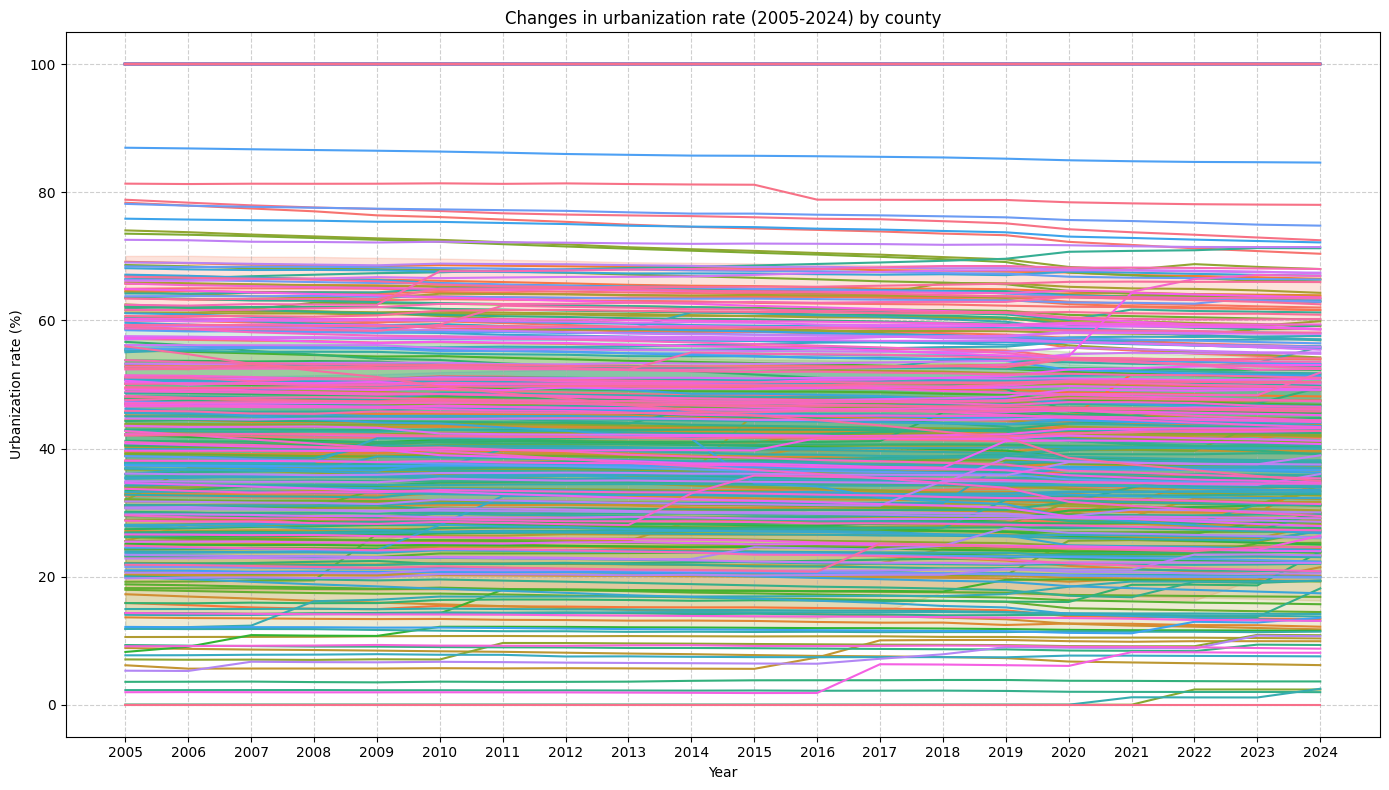

In [641]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data= urbanization_rate_df, 
    x= "year", 
    y= "urbanization_rate", 
    hue= "county", 
    legend= "full"
)

plt.title("Changes in urbanization rate (2005-2024) by county")
plt.xlabel("Year")
plt.xticks(sorted(urbanization_rate_df["year"].unique()))
plt.ylabel("Urbanization rate (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend().remove()
plt.tight_layout()
plt.show()

### Due to the lack of data from 2000 to 2004 for some counties, data for this year will be estimated using available data from subsequent years.

### Because the trend is non-linear (the lines clearly curve upwards and their slope increases over time), an ARIMA model was used to predict the data rather than linear regression.

### Due to the extensiveness of the operation and the lack of appropriate optimizations of the ARIMA module, the joblib module was used, which enables parallel processing that also involves other processor cores in parallel calculations. In this way, the speed of code processing was improved five times.(A previously defined function was used)

In [642]:
urbanization_rate_df["year"] = urbanization_rate_df["year"].astype(int)
urbanization_rate_df["terc_code"] = urbanization_rate_df["terc_code"].astype(str)
urbanization_rate_df["county"] = urbanization_rate_df["county"].astype(str)

urbanization_rate_df = urbanization_rate_df.drop_duplicates(subset=["county", "year", "terc_code"])

current_years = urbanization_rate_df["year"].unique()
target_years = [2000, 2001, 2002, 2003, 2004]
all_years = np.unique(np.concatenate((current_years, target_years))).astype(int)

unique_entities = urbanization_rate_df[["county", "terc_code"]].drop_duplicates().values

index_tuples = [
    (str(county), int(year), str(terc)) 
    for county, terc in unique_entities 
    for year in all_years
]

full_index = pd.MultiIndex.from_tuples(
    index_tuples, 
    names=["county", "year", "terc_code"]
)

urbanization_rate_df = (
    urbanization_rate_df
    .set_index(["county", "year", "terc_code"])
    .reindex(full_index)
    .reset_index()
)
urbanization_rate_df.head()

county  year terc_code  urbanization_rate
0  bolesławiecki  2000      0201                NaN
1  bolesławiecki  2001      0201                NaN
2  bolesławiecki  2002      0201                NaN
3  bolesławiecki  2003      0201                NaN
4  bolesławiecki  2004      0201                NaN

In [643]:
column_name = "urbanization_rate"
urbanization_rate_df["year"] = urbanization_rate_df["year"].astype(int)
urbanization_rate_df = urbanization_rate_df.sort_values(["county", "year"], ascending=[True, True])
grouped_df = urbanization_rate_df.dropna(subset=[column_name])

groups_data = [
    (county, df[column_name].to_numpy()) 
    for county, df in grouped_df.groupby("county")
]


results = Parallel(n_jobs=-1, verbose=5)(delayed(dcm.backcasting_arima)(county_id, vals, 5) for county_id, vals in groups_data)
valid_results = [res for res in results if res is not None]

urbanization_rate_df = dcm.update_df_after_arima_backcasting(urbanization_rate_df, valid_results, column_name, 2004)

del column_name
del grouped_df, groups_data
del results, valid_results 

print(urbanization_rate_df[urbanization_rate_df.isna().any(axis=1)])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   29.5s


Empty DataFrame
Columns: [county, year, terc_code, urbanization_rate]
Index: []


[Parallel(n_jobs=-1)]: Done 370 out of 370 | elapsed:   53.8s finished


In [644]:
urbanization_rate_df.head()

county  year terc_code  urbanization_rate
0  Biała Podlaska  2000      0661                0.0
1  Biała Podlaska  2001      0661                0.0
2  Biała Podlaska  2002      0661                0.0
3  Biała Podlaska  2003      0661                0.0
4  Biała Podlaska  2004      0661                0.0

__________________________________________________
### Demographic dependency ratio data.

In [645]:
demographic_dependency_ratio_df.head()

Kod                 Nazwa   Rok Wartosc
0  0201000  Powiat bolesławiecki  2002    60,0
1  0201000  Powiat bolesławiecki  2003    58,2
2  0201000  Powiat bolesławiecki  2004    56,5
3  0201000  Powiat bolesławiecki  2005    54,9
4  0201000  Powiat bolesławiecki  2006    53,7

In [646]:
demographic_dependency_ratio_df["Kod"] = demographic_dependency_ratio_df["Kod"].str[0:4]
demographic_dependency_ratio_df = (
    demographic_dependency_ratio_df
    .set_axis([
        "terc_code", 
        "county", 
        "year", 
        "demographic_dependency_ratio"
    ], 
    axis= 1
    )
)

demographic_dependency_ratio_df["demographic_dependency_ratio"] = (
    demographic_dependency_ratio_df["demographic_dependency_ratio"]
    .str.replace(",",".")
    .astype("float64")
)

demographic_dependency_ratio_df["county"] = (
    demographic_dependency_ratio_df["county"]
    .str.replace("Powiat m. st. ", "")
    .str.replace("Powiat m. ", "")
    .str.replace("Powiat ", "")
)

In [647]:
demographic_dependency_ratio_df.describe()

year  demographic_dependency_ratio
count  8763.000000                   8730.000000
mean   2013.000000                     61.697904
std       6.633628                      7.197249
min    2002.000000                     38.400000
25%    2007.000000                     56.200000
50%    2013.000000                     60.800000
75%    2019.000000                     67.100000
max    2024.000000                     88.200000

In [648]:
demographic_dependency_ratio_df[
    ~demographic_dependency_ratio_df["county"]
    .isin(county_names_ser)
]


terc_code             county  year  demographic_dependency_ratio
644      0263  Wałbrzych do 2002  2002                          56.9
645      0263  Wałbrzych do 2002  2003                           NaN
646      0263  Wałbrzych do 2002  2004                           NaN
647      0263  Wałbrzych do 2002  2005                           NaN
648      0263  Wałbrzych do 2002  2006                           NaN
649      0263  Wałbrzych do 2002  2007                           NaN
650      0263  Wałbrzych do 2002  2008                           NaN
651      0263  Wałbrzych do 2002  2009                           NaN
652      0263  Wałbrzych do 2002  2010                           NaN
653      0263  Wałbrzych do 2002  2011                           NaN
654      0263  Wałbrzych do 2002  2012                           NaN
655      0263  Wałbrzych do 2002  2013                           NaN
656      0263  Wałbrzych do 2002  2014                           NaN
657      0263  Wałbrzych do 2002  2015                           NaN
658      0263  Wałbrzych do 2002  2016                           NaN
659      0263  Wałbrzych do 2002  2017                           NaN
660      0263  Wałbrzych do 2002  2018                           NaN
661      0263  Wałbrzych do 2002  2019                           NaN
662      0263  Wałbrzych do 2002  2020                           NaN
663      0263  Wałbrzych do 2002  2021                           NaN
664      0263  Wałbrzych do 2002  2022                           NaN
665      0263  Wałbrzych do 2002  2023                           NaN
666      0263  Wałbrzych do 2002  2024                           NaN
690      0265  Wałbrzych od 2013  2002                           NaN
691      0265  Wałbrzych od 2013  2003                           NaN
692      0265  Wałbrzych od 2013  2004                           NaN
693      0265  Wałbrzych od 2013  2005                           NaN
694      0265  Wałbrzych od 2013  2006                           NaN
695      0265  Wałbrzych od 2013  2007                           NaN
696      0265  Wałbrzych od 2013  2008                           NaN
697      0265  Wałbrzych od 2013  2009                           NaN
698      0265  Wałbrzych od 2013  2010                           NaN
699      0265  Wałbrzych od 2013  2011                           NaN
700      0265  Wałbrzych od 2013  2012                           NaN
701      0265  Wałbrzych od 2013  2013                          57.8
702      0265  Wałbrzych od 2013  2014                          59.6
703      0265  Wałbrzych od 2013  2015                          61.8
704      0265  Wałbrzych od 2013  2016                          64.1
705      0265  Wałbrzych od 2013  2017                          66.7
706      0265  Wałbrzych od 2013  2018                          69.3
707      0265  Wałbrzych od 2013  2019                          71.8
708      0265  Wałbrzych od 2013  2020                          74.5
709      0265  Wałbrzych od 2013  2021                          76.5
710      0265  Wałbrzych od 2013  2022                          78.3
711      0265  Wałbrzych od 2013  2023                          79.9
712      0265  Wałbrzych od 2013  2024                          81.1

In [649]:
county_names_ser[
    ~county_names_ser
    .isin(demographic_dependency_ratio_df["county"])
]

3    Wałbrzych
Name: Powiat, dtype: string

In [650]:
demographic_dependency_ratio_df[
    demographic_dependency_ratio_df["county"]
    .str.contains("Wałbrzy")
]

terc_code             county  year  demographic_dependency_ratio
644      0263  Wałbrzych do 2002  2002                          56.9
645      0263  Wałbrzych do 2002  2003                           NaN
646      0263  Wałbrzych do 2002  2004                           NaN
647      0263  Wałbrzych do 2002  2005                           NaN
648      0263  Wałbrzych do 2002  2006                           NaN
649      0263  Wałbrzych do 2002  2007                           NaN
650      0263  Wałbrzych do 2002  2008                           NaN
651      0263  Wałbrzych do 2002  2009                           NaN
652      0263  Wałbrzych do 2002  2010                           NaN
653      0263  Wałbrzych do 2002  2011                           NaN
654      0263  Wałbrzych do 2002  2012                           NaN
655      0263  Wałbrzych do 2002  2013                           NaN
656      0263  Wałbrzych do 2002  2014                           NaN
657      0263  Wałbrzych do 2002  2015                           NaN
658      0263  Wałbrzych do 2002  2016                           NaN
659      0263  Wałbrzych do 2002  2017                           NaN
660      0263  Wałbrzych do 2002  2018                           NaN
661      0263  Wałbrzych do 2002  2019                           NaN
662      0263  Wałbrzych do 2002  2020                           NaN
663      0263  Wałbrzych do 2002  2021                           NaN
664      0263  Wałbrzych do 2002  2022                           NaN
665      0263  Wałbrzych do 2002  2023                           NaN
666      0263  Wałbrzych do 2002  2024                           NaN
690      0265  Wałbrzych od 2013  2002                           NaN
691      0265  Wałbrzych od 2013  2003                           NaN
692      0265  Wałbrzych od 2013  2004                           NaN
693      0265  Wałbrzych od 2013  2005                           NaN
694      0265  Wałbrzych od 2013  2006                           NaN
695      0265  Wałbrzych od 2013  2007                           NaN
696      0265  Wałbrzych od 2013  2008                           NaN
697      0265  Wałbrzych od 2013  2009                           NaN
698      0265  Wałbrzych od 2013  2010                           NaN
699      0265  Wałbrzych od 2013  2011                           NaN
700      0265  Wałbrzych od 2013  2012                           NaN
701      0265  Wałbrzych od 2013  2013                          57.8
702      0265  Wałbrzych od 2013  2014                          59.6
703      0265  Wałbrzych od 2013  2015                          61.8
704      0265  Wałbrzych od 2013  2016                          64.1
705      0265  Wałbrzych od 2013  2017                          66.7
706      0265  Wałbrzych od 2013  2018                          69.3
707      0265  Wałbrzych od 2013  2019                          71.8
708      0265  Wałbrzych od 2013  2020                          74.5
709      0265  Wałbrzych od 2013  2021                          76.5
710      0265  Wałbrzych od 2013  2022                          78.3
711      0265  Wałbrzych od 2013  2023                          79.9
712      0265  Wałbrzych od 2013  2024                          81.1

In [651]:
mask =  (
    ((demographic_dependency_ratio_df["county"] == "Wałbrzych do 2002")
    & 
    (demographic_dependency_ratio_df["year"] > 2012)
    ) | (
    (demographic_dependency_ratio_df["county"] == "Wałbrzych od 2013")
    & 
    (demographic_dependency_ratio_df["year"] < 2013))
)
demographic_dependency_ratio_df = (
    demographic_dependency_ratio_df[~mask]
)
          

In [652]:
demographic_dependency_ratio_df["county"] = (
    demographic_dependency_ratio_df["county"]
    .str.replace("Wałbrzych do 2002", "Wałbrzych")
    .str.replace("Wałbrzych od 2013", "Wałbrzych")
)
demographic_dependency_ratio_df[demographic_dependency_ratio_df["county"].str.startswith("Wałbrzych")]

terc_code     county  year  demographic_dependency_ratio
644      0263  Wałbrzych  2002                          56.9
645      0263  Wałbrzych  2003                           NaN
646      0263  Wałbrzych  2004                           NaN
647      0263  Wałbrzych  2005                           NaN
648      0263  Wałbrzych  2006                           NaN
649      0263  Wałbrzych  2007                           NaN
650      0263  Wałbrzych  2008                           NaN
651      0263  Wałbrzych  2009                           NaN
652      0263  Wałbrzych  2010                           NaN
653      0263  Wałbrzych  2011                           NaN
654      0263  Wałbrzych  2012                           NaN
701      0265  Wałbrzych  2013                          57.8
702      0265  Wałbrzych  2014                          59.6
703      0265  Wałbrzych  2015                          61.8
704      0265  Wałbrzych  2016                          64.1
705      0265  Wałbrzych  2017                          66.7
706      0265  Wałbrzych  2018                          69.3
707      0265  Wałbrzych  2019                          71.8
708      0265  Wałbrzych  2020                          74.5
709      0265  Wałbrzych  2021                          76.5
710      0265  Wałbrzych  2022                          78.3
711      0265  Wałbrzych  2023                          79.9
712      0265  Wałbrzych  2024                          81.1

In [653]:
demographic_dependency_ratio_df = dcm.update_terc_codes(demographic_dependency_ratio_df, territory_codes_df)

### Due to the fact that in the years 2003-2012 the Wałbrzych county was connected with the wałbrzyski county, it is necessary to intervene in the data from this time period so that these data do not interfere with the training of the predictive model in the future. Due to non linear data Armina model was used for this process based on data from the 2013-2024 time frame.

In [654]:
mask = (demographic_dependency_ratio_df["county"] == "Wałbrzych")
column_name = "demographic_dependency_ratio"
demographic_dependency_ratio_df["year"] = demographic_dependency_ratio_df["year"].astype(int)
demographic_dependency_ratio_df = demographic_dependency_ratio_df.sort_values(["county", "year"], ascending=[True, True])
grouped_df = demographic_dependency_ratio_df[mask].dropna(subset=[column_name])

groups_data = [
    (county, df[column_name].to_numpy()) 
    for county, df in grouped_df.groupby("county")
]


results = Parallel(n_jobs=-1, verbose=5)(delayed(dcm.backcasting_arima)(county_id, vals, 10) for county_id, vals in groups_data)
valid_results = [res for res in results if res is not None]

demographic_dependency_ratio_df = dcm.update_df_after_arima_backcasting(demographic_dependency_ratio_df, valid_results, column_name, 2012)

del column_name
del grouped_df, groups_data
del results, valid_results 

print(demographic_dependency_ratio_df[demographic_dependency_ratio_df.isna().any(axis=1)])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Empty DataFrame
Columns: [county, year, terc_code, demographic_dependency_ratio]
Index: []


In [655]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data= demographic_dependency_ratio_df, 
    x= "year", 
    y= "demographic_dependency_ratio", 
    hue= "county", 
    legend= "full"
)

plt.title("Changes in demographic dependecy ratio (2002-2024) by county")
plt.xlabel("Year")
plt.xticks(sorted(demographic_dependency_ratio_df["year"].unique()))
plt.ylabel("Demographic dependency ratio (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend().remove()
plt.tight_layout()
plt.show()

### Due to the lack of data for 2000 and 2001 for some counties, data for this year will be estimated using available data from subsequent years.

### Because the trend is non-linear (the lines clearly curve upwards and their slope increases over time), an ARIMA model was used to predict the 2000 and 2001 data rather than linear regression.

### Due to the extensiveness of the operation and the lack of appropriate optimizations of the ARIMA module, the joblib module was used, which enables parallel processing that also involves other processor cores in parallel calculations. In this way, the speed of code processing was improved five times.

In [656]:
demographic_dependency_ratio_df["year"] = demographic_dependency_ratio_df["year"].astype(int)
demographic_dependency_ratio_df["terc_code"] = demographic_dependency_ratio_df["terc_code"].astype(str)
demographic_dependency_ratio_df["county"] = demographic_dependency_ratio_df["county"].astype(str)

demographic_dependency_ratio_df = demographic_dependency_ratio_df.drop_duplicates(subset=["county", "year", "terc_code"])

current_years = demographic_dependency_ratio_df["year"].unique()
target_years = [2000, 2001]
all_years = np.unique(np.concatenate((current_years, target_years))).astype(int)

unique_entities = demographic_dependency_ratio_df[["county", "terc_code"]].drop_duplicates().values

index_tuples = [
    (str(county), int(year), str(terc)) 
    for county, terc in unique_entities 
    for year in all_years
]

full_index = pd.MultiIndex.from_tuples(
    index_tuples, 
    names=["county", "year", "terc_code"]
)

demographic_dependency_ratio_df = (
    demographic_dependency_ratio_df
    .set_index(["county", "year", "terc_code"])
    .reindex(full_index)
    .reset_index()
)
demographic_dependency_ratio_df.head()

county  year terc_code  demographic_dependency_ratio
0  Biała Podlaska  2000      0661                           NaN
1  Biała Podlaska  2001      0661                           NaN
2  Biała Podlaska  2002      0661                          55.8
3  Biała Podlaska  2003      0661                          53.4
4  Biała Podlaska  2004      0661                          51.2

In [657]:
column_name = "demographic_dependency_ratio"
demographic_dependency_ratio_df["year"] = demographic_dependency_ratio_df["year"].astype(int)
demographic_dependency_ratio_df = demographic_dependency_ratio_df.sort_values(["county", "year"], ascending=[True, True])
grouped_df = demographic_dependency_ratio_df.dropna(subset=[column_name])

groups_data = [
    (county, df[column_name].to_numpy()) 
    for county, df in grouped_df.groupby("county")
]


results = Parallel(n_jobs=-1, verbose=5)(delayed(dcm.backcasting_arima)(county_id, vals, 2) for county_id, vals in groups_data)
valid_results = [res for res in results if res is not None]

demographic_dependency_ratio_df = dcm.update_df_after_arima_backcasting(demographic_dependency_ratio_df, valid_results, column_name, 2001)

del column_name
del grouped_df, groups_data
del results, valid_results 

print(demographic_dependency_ratio_df[demographic_dependency_ratio_df.isna().any(axis=1)])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.6min


Empty DataFrame
Columns: [county, year, terc_code, demographic_dependency_ratio]
Index: []


[Parallel(n_jobs=-1)]: Done 370 out of 370 | elapsed:  2.1min finished


In [658]:
demographic_dependency_ratio_df.head()

county  year terc_code  demographic_dependency_ratio
0  Biała Podlaska  2000      0661                          61.0
1  Biała Podlaska  2001      0661                          58.0
2  Biała Podlaska  2002      0661                          55.8
3  Biała Podlaska  2003      0661                          53.4
4  Biała Podlaska  2004      0661                          51.2

___________________________________________________
### Average gross salary (PLN) data

In [659]:
average_gross_salary_df.head()

Kod                 Nazwa   Rok  Wartosc
0  0201000  Powiat bolesławiecki  2002  1873,59
1  0201000  Powiat bolesławiecki  2003  1951,43
2  0201000  Powiat bolesławiecki  2004  2027,29
3  0201000  Powiat bolesławiecki  2005  2086,26
4  0201000  Powiat bolesławiecki  2006  2153,06

In [660]:
average_gross_salary_df["Kod"] = average_gross_salary_df["Kod"].str[0:4]
average_gross_salary_df = (
    average_gross_salary_df
    .set_axis([
        "terc_code", 
        "county", 
        "year", 
        "average_gross_salary"
    ], 
    axis= 1
    )
)

average_gross_salary_df["average_gross_salary"] = (
    average_gross_salary_df["average_gross_salary"]
    .str.replace(",",".")
    .astype("float64")
)

average_gross_salary_df["county"] = (
    average_gross_salary_df["county"]
    .str.replace("Powiat m. st. ", "")
    .str.replace("Powiat m. ", "")
    .str.replace("Powiat ", "")
)

In [661]:
average_gross_salary_df.describe()

year  average_gross_salary
count  8763.000000           8730.000000
mean   2013.000000           3629.014361
std       6.633628           1577.029704
min    2002.000000              0.000000
25%    2007.000000           2451.075000
50%    2013.000000           3241.415000
75%    2019.000000           4413.555000
max    2024.000000          13672.980000

In [662]:
average_gross_salary_df[
    ~average_gross_salary_df["county"]
    .isin(county_names_ser)
]

terc_code             county  year  average_gross_salary
644      0263  Wałbrzych do 2002  2002               2117.52
645      0263  Wałbrzych do 2002  2003                   NaN
646      0263  Wałbrzych do 2002  2004                   NaN
647      0263  Wałbrzych do 2002  2005                   NaN
648      0263  Wałbrzych do 2002  2006                   NaN
649      0263  Wałbrzych do 2002  2007                   NaN
650      0263  Wałbrzych do 2002  2008                   NaN
651      0263  Wałbrzych do 2002  2009                   NaN
652      0263  Wałbrzych do 2002  2010                   NaN
653      0263  Wałbrzych do 2002  2011                   NaN
654      0263  Wałbrzych do 2002  2012                   NaN
655      0263  Wałbrzych do 2002  2013                   NaN
656      0263  Wałbrzych do 2002  2014                   NaN
657      0263  Wałbrzych do 2002  2015                   NaN
658      0263  Wałbrzych do 2002  2016                   NaN
659      0263  Wałbrzych do 2002  2017                   NaN
660      0263  Wałbrzych do 2002  2018                   NaN
661      0263  Wałbrzych do 2002  2019                   NaN
662      0263  Wałbrzych do 2002  2020                   NaN
663      0263  Wałbrzych do 2002  2021                   NaN
664      0263  Wałbrzych do 2002  2022                   NaN
665      0263  Wałbrzych do 2002  2023                   NaN
666      0263  Wałbrzych do 2002  2024                   NaN
690      0265  Wałbrzych od 2013  2002                   NaN
691      0265  Wałbrzych od 2013  2003                   NaN
692      0265  Wałbrzych od 2013  2004                   NaN
693      0265  Wałbrzych od 2013  2005                   NaN
694      0265  Wałbrzych od 2013  2006                   NaN
695      0265  Wałbrzych od 2013  2007                   NaN
696      0265  Wałbrzych od 2013  2008                   NaN
697      0265  Wałbrzych od 2013  2009                   NaN
698      0265  Wałbrzych od 2013  2010                   NaN
699      0265  Wałbrzych od 2013  2011                   NaN
700      0265  Wałbrzych od 2013  2012                   NaN
701      0265  Wałbrzych od 2013  2013               3735.14
702      0265  Wałbrzych od 2013  2014               3943.28
703      0265  Wałbrzych od 2013  2015               4036.65
704      0265  Wałbrzych od 2013  2016               4180.67
705      0265  Wałbrzych od 2013  2017               4481.44
706      0265  Wałbrzych od 2013  2018               4768.01
707      0265  Wałbrzych od 2013  2019               5189.24
708      0265  Wałbrzych od 2013  2020               5565.38
709      0265  Wałbrzych od 2013  2021               6015.80
710      0265  Wałbrzych od 2013  2022               6731.24
711      0265  Wałbrzych od 2013  2023               7584.09
712      0265  Wałbrzych od 2013  2024               8657.86

In [663]:
county_names_ser[
    ~county_names_ser
    .isin(average_gross_salary_df["county"])
]

3    Wałbrzych
Name: Powiat, dtype: string

In [664]:
mask =  (
    ((average_gross_salary_df["county"] == "Wałbrzych do 2002")
    & 
    (average_gross_salary_df["year"] > 2012)
    ) | (
    (average_gross_salary_df["county"] == "Wałbrzych od 2013")
    & 
    (average_gross_salary_df["year"] < 2013))
)
average_gross_salary_df = (
    average_gross_salary_df[~mask]
)
          

In [665]:
average_gross_salary_df["county"] = (
    average_gross_salary_df["county"]
    .str.replace("Wałbrzych do 2002", "Wałbrzych")
    .str.replace("Wałbrzych od 2013", "Wałbrzych")
)
average_gross_salary_df[average_gross_salary_df["county"].str.startswith("Wałbrzych")]

terc_code     county  year  average_gross_salary
644      0263  Wałbrzych  2002               2117.52
645      0263  Wałbrzych  2003                   NaN
646      0263  Wałbrzych  2004                   NaN
647      0263  Wałbrzych  2005                   NaN
648      0263  Wałbrzych  2006                   NaN
649      0263  Wałbrzych  2007                   NaN
650      0263  Wałbrzych  2008                   NaN
651      0263  Wałbrzych  2009                   NaN
652      0263  Wałbrzych  2010                   NaN
653      0263  Wałbrzych  2011                   NaN
654      0263  Wałbrzych  2012                   NaN
701      0265  Wałbrzych  2013               3735.14
702      0265  Wałbrzych  2014               3943.28
703      0265  Wałbrzych  2015               4036.65
704      0265  Wałbrzych  2016               4180.67
705      0265  Wałbrzych  2017               4481.44
706      0265  Wałbrzych  2018               4768.01
707      0265  Wałbrzych  2019               5189.24
708      0265  Wałbrzych  2020               5565.38
709      0265  Wałbrzych  2021               6015.80
710      0265  Wałbrzych  2022               6731.24
711      0265  Wałbrzych  2023               7584.09
712      0265  Wałbrzych  2024               8657.86

In [666]:
average_gross_salary_df = dcm.update_terc_codes(average_gross_salary_df, territory_codes_df)

### Due to the lack of data on average earnings in the Wałbrzych county in 2002-2012. The data entered in their place are averaged to 80% of the average national earnings. This averaging is caused by the high level of unemployment and the industrial restructuring that took place in that region in those years.

In [667]:
missing_values = [
    2201.47, 2289.57, 2380.29, 2477.23, 2691.03, 
    2943.88, 3102.96, 3224.98, 3399.52, 3521.67
]
for i in range(10):
    mask = (
        (average_gross_salary_df["county"] == "Wałbrzych")
        &
        (average_gross_salary_df["year"] == 2003 + i)
    )
    average_gross_salary_df.loc[mask, "average_gross_salary"] = missing_values[i]
del missing_values
average_gross_salary_df[average_gross_salary_df["county"] == "Wałbrzych"] 

terc_code     county  year  average_gross_salary
644      0265  Wałbrzych  2002               2117.52
645      0265  Wałbrzych  2003               2201.47
646      0265  Wałbrzych  2004               2289.57
647      0265  Wałbrzych  2005               2380.29
648      0265  Wałbrzych  2006               2477.23
649      0265  Wałbrzych  2007               2691.03
650      0265  Wałbrzych  2008               2943.88
651      0265  Wałbrzych  2009               3102.96
652      0265  Wałbrzych  2010               3224.98
653      0265  Wałbrzych  2011               3399.52
654      0265  Wałbrzych  2012               3521.67
701      0265  Wałbrzych  2013               3735.14
702      0265  Wałbrzych  2014               3943.28
703      0265  Wałbrzych  2015               4036.65
704      0265  Wałbrzych  2016               4180.67
705      0265  Wałbrzych  2017               4481.44
706      0265  Wałbrzych  2018               4768.01
707      0265  Wałbrzych  2019               5189.24
708      0265  Wałbrzych  2020               5565.38
709      0265  Wałbrzych  2021               6015.80
710      0265  Wałbrzych  2022               6731.24
711      0265  Wałbrzych  2023               7584.09
712      0265  Wałbrzych  2024               8657.86

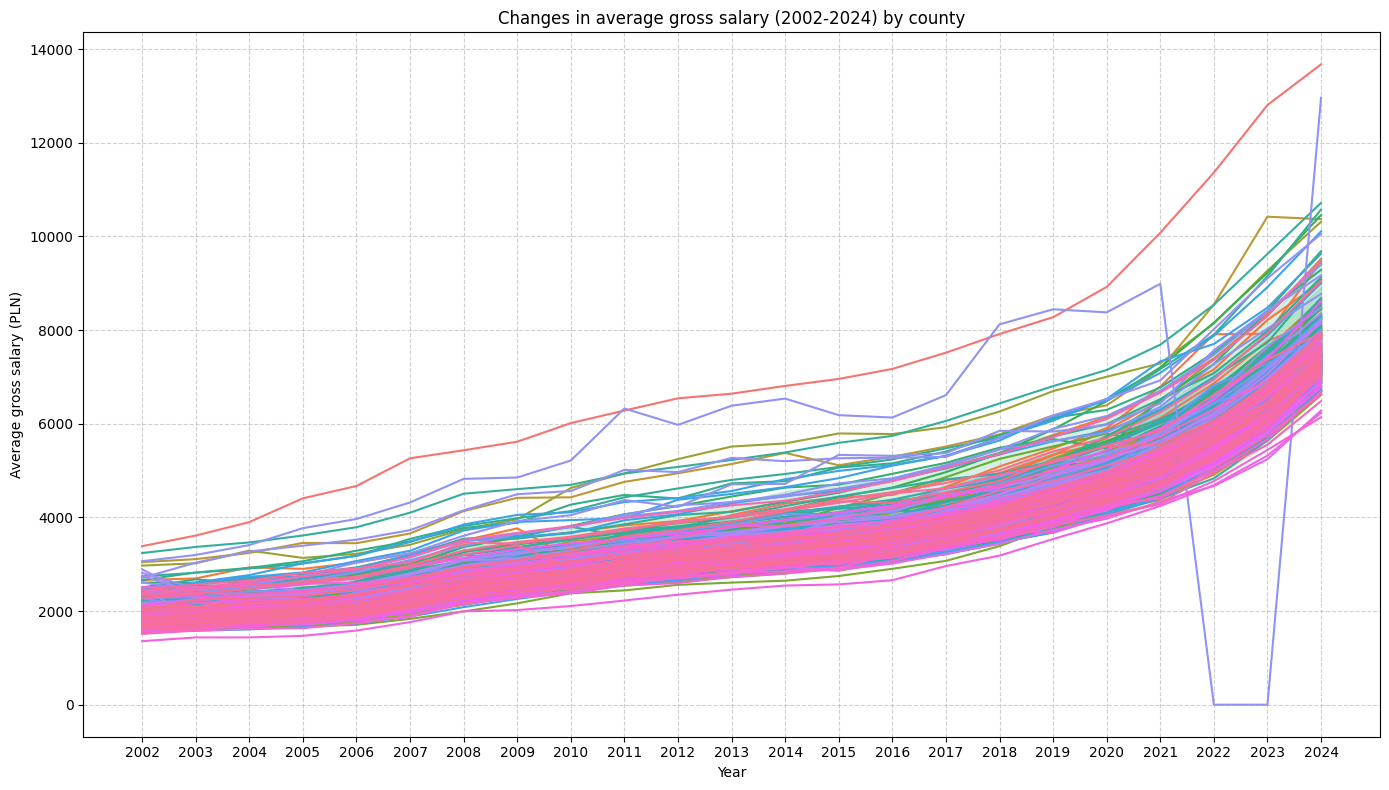

In [668]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data= average_gross_salary_df, 
    x= "year", 
    y= "average_gross_salary", 
    hue= "county", 
    legend= "full"
)

plt.title("Changes in average gross salary (2002-2024) by county")
plt.xlabel("Year")
plt.xticks(sorted(average_gross_salary_df["year"].unique()))
plt.ylabel("Average gross salary (PLN)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend().remove()
plt.tight_layout()
plt.show()

In [669]:
average_gross_salary_df[average_gross_salary_df["average_gross_salary"] <= 0]

terc_code            county  year  average_gross_salary
6391      2467  Jastrzębie-Zdrój  2022                   0.0
6392      2467  Jastrzębie-Zdrój  2023                   0.0

### Due to the lack of available data on average earnings in the Jastrzębie-Zdrój county, these data had to be predicted. Due to the non-linearity of the data, the ARIMA model was used to obtain them, following the example of previous years.


In [670]:
mask = (
    (average_gross_salary_df["county"] == "Jastrzębie-Zdrój") 
    & 
    (average_gross_salary_df["year"] < 2022)
)
training_data = average_gross_salary_df[mask].set_index("year")["average_gross_salary"].dropna()

model = pm.auto_arima(
    training_data, 
    start_p= 1, 
    start_q= 1, 
    max_p= 5, 
    max_q= 5, 
    m= 1, 
    d= None, 
    seasonal= False, 
    stepwise= True, 
    suppress_warnings= True, 
    error_action= "ignore"
)

prediction = model.predict(n_periods=2)

for i in range(2):
    mask = (
        (average_gross_salary_df["county"] == "Jastrzębie-Zdrój") 
        & 
        (average_gross_salary_df["year"] == 2022 + i)
    )
    average_gross_salary_df.loc[mask, "average_gross_salary"] = prediction.iloc[i]

del training_data
del model


In [671]:
average_gross_salary_df[average_gross_salary_df["average_gross_salary"] <= 0]

Empty DataFrame
Columns: [terc_code, county, year, average_gross_salary]
Index: []

### Due to the lack of data for 2000 and 2001 for some counties, data for this year will be estimated using available data from subsequent years.

### Because the trend is non-linear (the lines clearly curve upwards and their slope increases over time), an ARIMA model was used to predict the 2000 and 2001 data rather than linear regression.

### Due to the extensiveness of the operation and the lack of appropriate optimizations of the ARIMA module, the joblib module was used, which enables parallel processing that also involves other processor cores in parallel calculations. In this way, the speed of code processing was improved five times.

In [672]:
average_gross_salary_df["year"] = average_gross_salary_df["year"].astype(int)
average_gross_salary_df["terc_code"] = average_gross_salary_df["terc_code"].astype(str)
average_gross_salary_df["county"] = average_gross_salary_df["county"].astype(str)

average_gross_salary_df = average_gross_salary_df.drop_duplicates(subset=["county", "year", "terc_code"])

current_years = average_gross_salary_df["year"].unique()
target_years = [2000, 2001]
all_years = np.unique(np.concatenate((current_years, target_years))).astype(int)

unique_entities = average_gross_salary_df[["county", "terc_code"]].drop_duplicates().values

index_tuples = [
    (str(county), int(year), str(terc)) 
    for county, terc in unique_entities 
    for year in all_years
]

full_index = pd.MultiIndex.from_tuples(
    index_tuples, 
    names=["county", "year", "terc_code"]
)

average_gross_salary_df = (
    average_gross_salary_df
    .set_index(["county", "year", "terc_code"])
    .reindex(full_index)
    .reset_index()
)
average_gross_salary_df.head()

county  year terc_code  average_gross_salary
0  bolesławiecki  2000      0201                   NaN
1  bolesławiecki  2001      0201                   NaN
2  bolesławiecki  2002      0201               1873.59
3  bolesławiecki  2003      0201               1951.43
4  bolesławiecki  2004      0201               2027.29

In [673]:
column_name = "average_gross_salary"
average_gross_salary_df["year"] = average_gross_salary_df["year"].astype(int)
average_gross_salary_df = average_gross_salary_df.sort_values(["county", "year"], ascending=[True, True])
grouped_df = average_gross_salary_df.dropna(subset=[column_name])

groups_data = [
    (county, df[column_name].to_numpy()) 
    for county, df in grouped_df.groupby("county")
]


results = Parallel(n_jobs=-1, verbose=5)(delayed(dcm.backcasting_arima)(county_id, vals, 2) for county_id, vals in groups_data)
valid_results = [res for res in results if res is not None]

average_gross_salary_df = dcm.update_df_after_arima_backcasting(average_gross_salary_df, valid_results, column_name, 2001)

del column_name
del grouped_df, groups_data
del results, valid_results 

print(average_gross_salary_df[average_gross_salary_df.isna().any(axis=1)])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   28.6s


Empty DataFrame
Columns: [county, year, terc_code, average_gross_salary]
Index: []


[Parallel(n_jobs=-1)]: Done 370 out of 370 | elapsed:   40.6s finished


In [674]:
average_gross_salary_df.head()

county  year terc_code  average_gross_salary
0  Biała Podlaska  2000      0661               1931.00
1  Biała Podlaska  2001      0661               1851.00
2  Biała Podlaska  2002      0661               1818.70
3  Biała Podlaska  2003      0661               1834.22
4  Biała Podlaska  2004      0661               1994.06

_______________________________________________
### Unemployment data

In [675]:
unemployment_df.head()

Kod   Nazwa   Rok    Wartosc
0  0000000  POLSKA  2000  2702576.0
1  0000000  POLSKA  2001  3115056.0
2  0000000  POLSKA  2002  3216958.0
3  0000000  POLSKA  2003  3175674.0
4  0000000  POLSKA  2004  2999601.0

In [676]:
unemployment_df["Kod"] = unemployment_df["Kod"].str[0:4]
unemployment_df = (
    unemployment_df[
        ~(unemployment_df["Nazwa"].str.isupper())
    ]
    .set_axis([
        "terc_code", 
        "county", 
        "year", 
        "unemployment"
    ], 
    axis= 1
    )
)

unemployment_df["county"] = (
    unemployment_df["county"]
    .str.replace("Powiat m. st. ", "")
    .str.replace("Powiat m. ", "")
    .str.replace("Powiat ", "")
)

In [677]:
unemployment_df.describe()

year  unemployment
count  9550.00000   9476.000000
mean   2012.00000   4812.830941
std       7.21148   4417.789677
min    2000.00000    269.000000
25%    2006.00000   2200.750000
50%    2012.00000   3715.000000
75%    2018.00000   6045.500000
max    2024.00000  65177.000000

In [678]:
unemployment_df[
    ~unemployment_df["county"]
    .isin(county_names_ser)
]


terc_code             county  year  unemployment
750       0263  Wałbrzych do 2002  2000       11371.0
751       0263  Wałbrzych do 2002  2001       14033.0
752       0263  Wałbrzych do 2002  2002       15518.0
753       0263  Wałbrzych do 2002  2003           NaN
754       0263  Wałbrzych do 2002  2004           NaN
...        ...                ...   ...           ...
4420      1431         warszawski  2020           NaN
4421      1431         warszawski  2021           NaN
4422      1431         warszawski  2022           NaN
4423      1431         warszawski  2023           NaN
4424      1431         warszawski  2024           NaN

[75 rows x 4 columns]

In [679]:
county_names_ser[
    ~county_names_ser
    .isin(unemployment_df["county"])
]

3    Wałbrzych
Name: Powiat, dtype: string

In [680]:
mask =  (
    ((unemployment_df["county"] == "Wałbrzych do 2002")
    & 
    (unemployment_df["year"] > 2012)
    ) | (
    (unemployment_df["county"] == "Wałbrzych od 2013")
    & 
    (unemployment_df["year"] < 2013))
)
unemployment_df = (
    unemployment_df[~mask]
)

In [681]:
unemployment_df["county"] = (
    unemployment_df["county"]
    .str.replace("Wałbrzych do 2002", "Wałbrzych")
    .str.replace("Wałbrzych od 2013", "Wałbrzych")
)
unemployment_df[unemployment_df["county"].str.startswith("Wałbrzych")]

terc_code     county  year  unemployment
750      0263  Wałbrzych  2000       11371.0
751      0263  Wałbrzych  2001       14033.0
752      0263  Wałbrzych  2002       15518.0
753      0263  Wałbrzych  2003           NaN
754      0263  Wałbrzych  2004           NaN
755      0263  Wałbrzych  2005           NaN
756      0263  Wałbrzych  2006           NaN
757      0263  Wałbrzych  2007           NaN
758      0263  Wałbrzych  2008           NaN
759      0263  Wałbrzych  2009           NaN
760      0263  Wałbrzych  2010           NaN
761      0263  Wałbrzych  2011           NaN
762      0263  Wałbrzych  2012           NaN
813      0265  Wałbrzych  2013        7700.0
814      0265  Wałbrzych  2014        5816.0
815      0265  Wałbrzych  2015        4494.0
816      0265  Wałbrzych  2016        3891.0
817      0265  Wałbrzych  2017        3044.0
818      0265  Wałbrzych  2018        2489.0
819      0265  Wałbrzych  2019        1974.0
820      0265  Wałbrzych  2020        2403.0
821      0265  Wałbrzych  2021        1840.0
822      0265  Wałbrzych  2022        1595.0
823      0265  Wałbrzych  2023        1643.0
824      0265  Wałbrzych  2024        1903.0

In [682]:
unemployment_df[unemployment_df["county"].str.startswith("wałbrzyski")]

terc_code      county  year  unemployment
550      0221  wałbrzyski  2000        6311.0
551      0221  wałbrzyski  2001        7577.0
552      0221  wałbrzyski  2002        7933.0
553      0221  wałbrzyski  2003       22056.0
554      0221  wałbrzyski  2004       21034.0
555      0221  wałbrzyski  2005       19118.0
556      0221  wałbrzyski  2006       16260.0
557      0221  wałbrzyski  2007       10679.0
558      0221  wałbrzyski  2008        9863.0
559      0221  wałbrzyski  2009       12286.0
560      0221  wałbrzyski  2010       11511.0
561      0221  wałbrzyski  2011       11469.0
562      0221  wałbrzyski  2012       12517.0
563      0221  wałbrzyski  2013        4339.0
564      0221  wałbrzyski  2014        3577.0
565      0221  wałbrzyski  2015        2995.0
566      0221  wałbrzyski  2016        2531.0
567      0221  wałbrzyski  2017        1769.0
568      0221  wałbrzyski  2018        1717.0
569      0221  wałbrzyski  2019        1547.0
570      0221  wałbrzyski  2020        1842.0
571      0221  wałbrzyski  2021        1603.0
572      0221  wałbrzyski  2022        1431.0
573      0221  wałbrzyski  2023        1405.0
574      0221  wałbrzyski  2024        1402.0

### Due to the lack of data for the Wałbrzych county in the years 2002-2012 due to the merger of the Wałbrzych urban county and the wałbrzyski county, these data were divided in different proportions based on historical data, assuming that Wałbrzych constituted 67% of the inhabitants of the Wałbrzych county in 2002 and 56% in 2012. Linear interpolation was used for this purpose.


In [683]:
years_range = np.arange(2003, 2013)
factors = np.linspace(0.67, 0.56, len(years_range))

for year, factor in zip(years_range, factors):
    mask = (
        (unemployment_df["county"] == "wałbrzyski")
        & 
        (unemployment_df["year"] == year)
    )
    mask_2 = (
        (unemployment_df["county"] == "Wałbrzych") 
        & 
        (unemployment_df["year"] == year)
    )

    unemployment_df.loc[mask_2, "unemployment"] = int(round(unemployment_df.loc[mask, "unemployment"].values[0] * factor))

    unemployment_df.loc[mask, "unemployment"] = (
        int(round(unemployment_df.loc[mask, "unemployment"].values[0] - 
                  unemployment_df.loc[mask_2, "unemployment"].values[0])))

In [684]:
unemployment_df[unemployment_df["county"].str.startswith("wałbrzyski")]

terc_code      county  year  unemployment
550      0221  wałbrzyski  2000        6311.0
551      0221  wałbrzyski  2001        7577.0
552      0221  wałbrzyski  2002        7933.0
553      0221  wałbrzyski  2003        7278.0
554      0221  wałbrzyski  2004        7198.0
555      0221  wałbrzyski  2005        6776.0
556      0221  wałbrzyski  2006        5962.0
557      0221  wałbrzyski  2007        4046.0
558      0221  wałbrzyski  2008        3858.0
559      0221  wałbrzyski  2009        4955.0
560      0221  wałbrzyski  2010        4783.0
561      0221  wałbrzyski  2011        4906.0
562      0221  wałbrzyski  2012        5507.0
563      0221  wałbrzyski  2013        4339.0
564      0221  wałbrzyski  2014        3577.0
565      0221  wałbrzyski  2015        2995.0
566      0221  wałbrzyski  2016        2531.0
567      0221  wałbrzyski  2017        1769.0
568      0221  wałbrzyski  2018        1717.0
569      0221  wałbrzyski  2019        1547.0
570      0221  wałbrzyski  2020        1842.0
571      0221  wałbrzyski  2021        1603.0
572      0221  wałbrzyski  2022        1431.0
573      0221  wałbrzyski  2023        1405.0
574      0221  wałbrzyski  2024        1402.0

In [685]:
unemployment_df[
    ~unemployment_df["county"]
    .isin(county_names_ser)
]

terc_code      county  year  unemployment
4400      1431  warszawski  2000       33972.0
4401      1431  warszawski  2001       53774.0
4402      1431  warszawski  2002           NaN
4403      1431  warszawski  2003           NaN
4404      1431  warszawski  2004           NaN
4405      1431  warszawski  2005           NaN
4406      1431  warszawski  2006           NaN
4407      1431  warszawski  2007           NaN
4408      1431  warszawski  2008           NaN
4409      1431  warszawski  2009           NaN
4410      1431  warszawski  2010           NaN
4411      1431  warszawski  2011           NaN
4412      1431  warszawski  2012           NaN
4413      1431  warszawski  2013           NaN
4414      1431  warszawski  2014           NaN
4415      1431  warszawski  2015           NaN
4416      1431  warszawski  2016           NaN
4417      1431  warszawski  2017           NaN
4418      1431  warszawski  2018           NaN
4419      1431  warszawski  2019           NaN
4420      1431  warszawski  2020           NaN
4421      1431  warszawski  2021           NaN
4422      1431  warszawski  2022           NaN
4423      1431  warszawski  2023           NaN
4424      1431  warszawski  2024           NaN

In [686]:
for i in range(2):
    mask = (
        (unemployment_df["county"] == "Warszawa") 
        & 
        (unemployment_df["year"] == 2000 + i)
    )
    mask_2 = (
        (unemployment_df["county"] == "warszawski") 
        & 
        (unemployment_df["year"] == 2000 + i)
    )
    unemployment_df.loc[mask, "unemployment"] = unemployment_df.loc[mask_2, "unemployment"]

unemployment_df = (
    unemployment_df[
        ~(unemployment_df["county"] == "warszawski")]
)

In [687]:
unemployment_df = dcm.update_terc_codes(unemployment_df, territory_codes_df)

In [688]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data= unemployment_df, 
    x= "year", 
    y= "unemployment", 
    hue= "county", 
    legend= "full"
)

plt.title("Changes in unemployment (2002-2024) by county")
plt.xlabel("Year")
plt.xticks(sorted(unemployment_df["year"].unique()))
plt.ylabel("Unemployment")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend().remove()
plt.tight_layout()
plt.show()

In [689]:
unemployment_df[unemployment_df.isna().any(axis= 1)]

terc_code       county  year  unemployment
2350      0812    wschowski  2000           NaN
2351      0812    wschowski  2001           NaN
2950      1021   brzeziński  2000           NaN
2951      1021   brzeziński  2001           NaN
4700      1465     Warszawa  2000           NaN
4701      1465     Warszawa  2001           NaN
5575      1821        leski  2000           NaN
5576      1821        leski  2001           NaN
6550      2216     sztumski  2000           NaN
6551      2216     sztumski  2001           NaN
8425      2818    gołdapski  2000           NaN
8426      2818    gołdapski  2001           NaN
8450      2819  węgorzewski  2000           NaN
8451      2819  węgorzewski  2001           NaN
9875      3218      łobeski  2000           NaN
9876      3218      łobeski  2001           NaN

In [690]:
target_counties = [
    "wschowski", "brzeziński", "Warszawa", "leski", 
    "sztumski", "gołdapski", "węgorzewski", "łobeski"
]

column_name = "unemployment"
unemployment_df["year"] = unemployment_df["year"].astype(int)
unemployment_df = unemployment_df.sort_values(["county", "year"], ascending= [True, True])

grouped_df = unemployment_df.dropna(subset=[column_name])
grouped_df = grouped_df[grouped_df["county"].isin(target_counties)]

groups_data = [
    (county, df[column_name].to_numpy()) 
    for county, df in grouped_df.groupby("county")
]

results = Parallel(n_jobs=-1, verbose=5)(delayed(dcm.backcasting_arima)(county_id, vals, 2) for county_id, vals in groups_data)
valid_results = [res for res in results if res is not None]

unemployment_df = dcm.update_df_after_arima_backcasting(unemployment_df, valid_results, column_name, 2001)

del column_name
del grouped_df, groups_data
del results, valid_results 

unemployment_df[unemployment_df.isna().any(axis= 1)]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.9s finished


Empty DataFrame
Columns: [county, year, terc_code, unemployment]
Index: []

In [691]:
unemployment_df[unemployment_df.isna().any(axis= 1)]

Empty DataFrame
Columns: [county, year, terc_code, unemployment]
Index: []

In [692]:
unemployment_df.head()

county  year terc_code  unemployment
0  Biała Podlaska  2000      0661        4320.0
1  Biała Podlaska  2001      0661        4981.0
2  Biała Podlaska  2002      0661        5163.0
3  Biała Podlaska  2003      0661        4886.0
4  Biała Podlaska  2004      0661        4733.0

____________________________________________________________________
# 3. Data merging and extracting

### Dataframes with voter turnout and indicators will be exported separately to parquet files. 

### The choice of format was based on the preservation of the properties of data types contained in individual columns of these dataframes, as well as the compression speed.

### These data have not yet been combined into one dataframe at this stage, because this operation will be performed in the next notebook.

___________________________________________
### Election data

In [693]:
datasets = [
    (presidential_election_2000_df, 2000, 1), 
    (presidential_election_2005_1st_round_df, 2005, 1), 
    (presidential_election_2005_2nd_round_df, 2005, 2), 
    (presidential_election_2010_1st_round_df, 2010, 1), 
    (presidential_election_2010_2nd_round_df, 2010, 2), 
    (presidential_election_2015_1st_round_df, 2015, 1), 
    (presidential_election_2015_2nd_round_df, 2015, 2), 
    (presidential_election_2020_1st_round_df, 2020, 1), 
    (presidential_election_2020_2nd_round_df, 2020, 2), 
    (presidential_election_2025_1st_round_df, 2025, 1), 
    (presidential_election_2025_2nd_round_df, 2025, 2)
]

presidential_election_df = (pd.concat([
    df.assign(
        year= year, 
        round= election_round,
        terc_code= df['terc_code'].astype(str).str.zfill(4)
    )
    for df, year, election_round in datasets
], 
ignore_index= True)
.sort_values(by= ['terc_code', 'year', 'round'])
)

presidential_election_df.reset_index(inplace= True, drop= True)
presidential_election_df.head()

county terc_code  turnout_percentage  year  round
0  bolesławiecki      0201               58.50  2000      1
1  bolesławiecki      0201               44.16  2005      1
2  bolesławiecki      0201               45.09  2005      2
3  bolesławiecki      0201               50.33  2010      1
4  bolesławiecki      0201               49.09  2010      2

In [694]:
presidential_election_df.to_parquet("../data/proccesed_data/presidential_election.parquet")

___________________________
### Indicators

In [695]:

dfs_to_merge = [
    population_density_df, population_70_plus_df, total_population_df, urbanization_rate_df, 
    demographic_dependency_ratio_df, average_gross_salary_df, unemployment_df
]

indicators_df = reduce(
    lambda left, right: pd.merge(
        left, 
        right, 
        on= ["terc_code", "county", "year"], 
        how= "outer",                        
        validate= "1:1"                      
    ), 
    dfs_to_merge
)

indicators_df = indicators_df.sort_values(["terc_code", "year"]).reset_index(drop=True)
indicators_df = dcm.merge_df_by_voivodeship(indicators_df, gdp_per_capita_df, "gdp_per_capita")

del dfs_to_merge

indicators_df.shape
indicators_df.head()



terc_code         county  year  population_density  population_70_plus  \
0      0201  bolesławiecki  2000                67.4              5319.0   
1      0201  bolesławiecki  2001                67.5              5627.0   
2      0201  bolesławiecki  2002                67.6              6484.0   
3      0201  bolesławiecki  2003                67.8              6771.0   
4      0201  bolesławiecki  2004                67.8              7023.0   

   total_population  urbanization_rate  demographic_dependency_ratio  \
0           88194.0               52.0                          64.0   
1           88076.0               52.0                          62.0   
2           88132.0               52.0                          60.0   
3           88308.0               51.0                          58.2   
4           88378.0               51.0                          56.5   

   average_gross_salary  unemployment  gdp_per_capita  
0               1850.00        8886.0         20088.0  
1               1840.00        9218.0         20639.0  
2               1873.59        8574.0         21744.0  
3               1951.43        8803.0         22608.0  
4               2027.29        7966.0         24621.0

In [696]:
indicators_df.to_parquet("../data/proccesed_data/indicators.parquet")